In [48]:
# Importing the libraries 
import numpy # https://numpy.org/

import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt  # https://matplotlib.org/
import seaborn as sns # https://seaborn.pydata.org/

from sklearn import model_selection       
from sklearn.metrics import classification_report   
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error  
from sklearn.metrics import max_error

from sklearn.model_selection import GridSearchCV
# data preprocessing / feature selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# combining
from sklearn.pipeline import make_pipeline


from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split, cross_val_score

import warnings

1. a. Loading data from 'winequality_white.csv' and Summrizing the data
   b. A table and graph summarizing the dataset statistics
   c. Setting a classification problem for predicting the quality value based on the values of all the other variables in the file (acidity, alcohol, pH, etc.)
   d. Splitting the dataset into separate training and test sets and stratify the training set into k-folds and setting 'f1_micro' as scoring method

In [49]:
print('Loading data from file ...')  # Loading the data
dataset = pandas.read_csv('winequality_white.csv') # default is header=infer, change if column names are not in first row
print('done \n')

print('Removing rows with missing data ...')  # Make things simple
dataset = dataset.dropna()  # default is to drop any row that contains at least one missing value
print('done \n')

Loading data from file ...
done 

Removing rows with missing data ...
done 



In [50]:
#Printing data to check first 5 and last 5 lines
print('Sample rows from the dataset (top ten):')  
print(dataset.head(5))  # first 5 rows

print('Sample rows from the dataset (bottom ten):')  
print(dataset.tail(5))  # last 5 rows

Sample rows from the dataset (top ten):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.2              0.66         0.48             1.2      0.029   
1            6.2              0.66         0.48             1.2      0.029   
2            6.8              0.26         0.42             1.7      0.049   
3            6.7              0.23         0.31             2.1      0.046   
4            6.7              0.23         0.31             2.1      0.046   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 29.0                  75.0   0.9892  3.33       0.39   
1                 29.0                  75.0   0.9892  3.33       0.39   
2                 41.0                 122.0   0.9930  3.47       0.48   
3                 30.0                  96.0   0.9926  3.33       0.64   
4                 30.0                  96.0   0.9926  3.33       0.64   

   alcohol  quality  
0     12.8        8  
1 

In [51]:
# A numerical summary table of the above data
print('Summary of the dataset - Univariate statistics')   
print(dataset.describe(include='all'))

Summary of the dataset - Univariate statistics
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4873.000000       4873.000000  4873.000000     4873.000000   
mean        6.851149          0.277995     0.334131        6.393741   
std         0.837109          0.100592     0.121189        5.072535   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4873.000000          4873.000000           4873.000000  4873.000000   
mean      0.045756            35.236097            138.251283     0.994026   
std       0.021695            16.445156             42.011360     0.002990   
m

In [52]:
# Predicting the quality value (a single variable with five classes labeled 4, 5, …, 8) based on the values of all the other variables in the file (acidity, alcohol, pH, etc.

print('Reading list of problem variables X and Y...')
X_name = [ 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol' ] # names of columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features
y_name = 'quality'   # name of column to focus on as target
y = dataset[y_name]   # only keep this column as label 
print('done \n')

Reading list of problem variables X and Y...
done 



Summary of X - Univariate graphs


<Figure size 640x480 with 0 Axes>

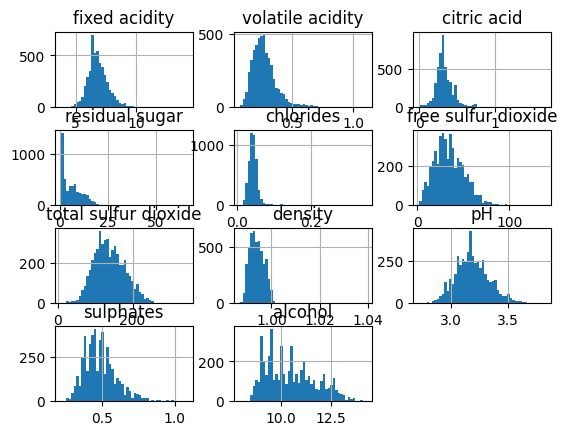

<Figure size 640x480 with 0 Axes>

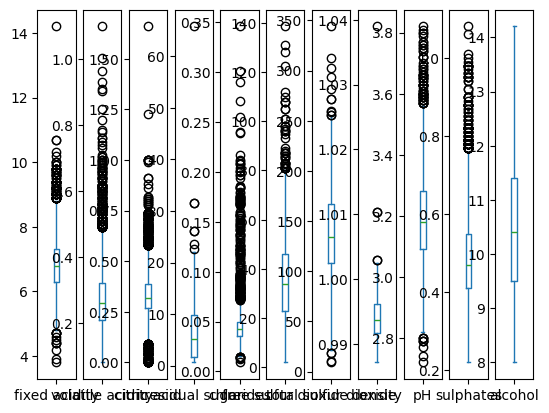

In [53]:
print('Summary of X - Univariate graphs')

plt.figure()  
X.hist(bins=50)  # histogram with number of bins ~= sqrt(N)
plt.show()

plt.figure()
X.plot(kind='box', subplots=True, sharex=False, sharey=False)  # boxplots
plt.show()

Summary of X - Bivariate (column-pair) graphs:


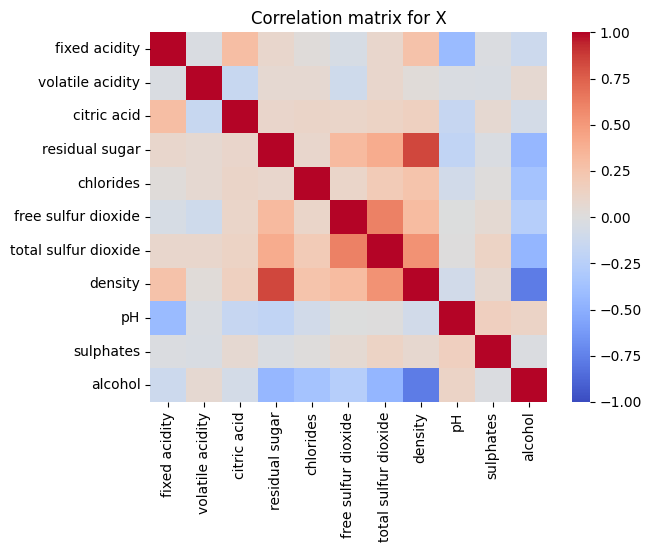

<Figure size 640x480 with 0 Axes>

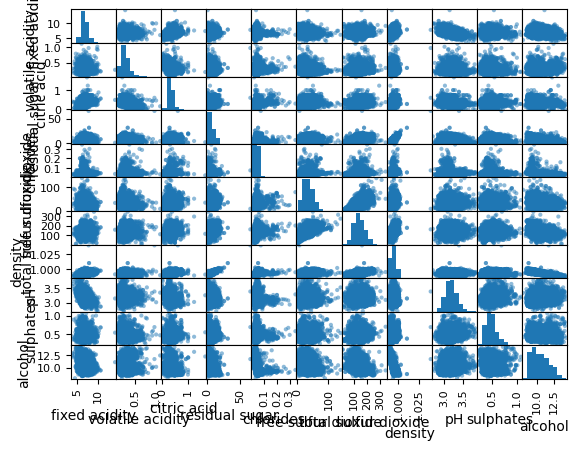

In [54]:
# More graphical summaries
print('Summary of X - Bivariate (column-pair) graphs:')

#Plotting correlation matrix
plt.figure()
corr = X.corr()    # compute the correlation between the variables
sns.heatmap( corr, cmap='coolwarm', vmax=1.0, vmin=-1.0 );   # plot it as a heat map
plt.title('Correlation matrix for X')
plt.show()

plt.figure()
scatter_matrix(X)
plt.show()

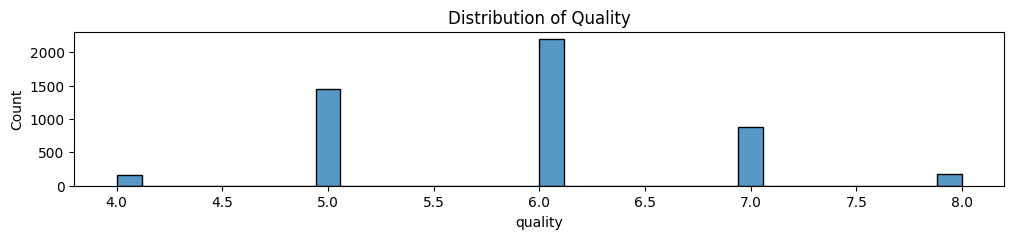

In [55]:
# Plotting the distribution of y
plt.figure(figsize=(12, 2))   # we can control the size of the figure
sns.histplot(data=y)
plt.title('Distribution of Quality')
plt.show()

In [56]:
# Setting up ML framework 
# Splitting data into training and testing datasets
test_pct = 0.80   # reserving a random 20% of the data points for testing performance
seed = 42          # setting the seed means that _the_same_ 20% will be split for testing every time we run this notebook - this allows for repeatability/reproducibility
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=42)

scaler_minmax = MinMaxScaler()
scaler_std = StandardScaler()

X_train_scaled = scaler_minmax.fit_transform(X_train)
#y_train_scaled = scaler_minmax.fit_transform(y_train)
X_test_scaled = scaler_minmax.transform(X_test)
#y_test_scaled = scaler_minmax.transform(y_test)

X_train_scaled_std = scaler_std.fit_transform(X_train)
#y_train_scaled_std = scaler_std.fit_transform(y_train)
X_test_scaled_std = scaler_std.transform(X_test)
#y_test_scaled_std = scaler_std.transform(y_test)

# Chose the scoring method
scoring_method = 'f1_micro'

In [57]:
# Training candidate models on the training data and checking their performance on unseen test data.
hyperparameters = {'kernel':['linear', 'sigmoid', 'poly', 'rbf'],'class_weight':[None, 'balanced'] }    # specify the versions of the family members
kfold = model_selection.StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)  # create the k folds of the TRAINING data

2. a. Use cross-validation to train and tune an MLPClassifier model whose configurations all have a single hidden layer but different numbers of neurons

In [58]:
# Designing the classifier neural network
neurons = [2, 4, 8, 16, 32, 64, 128, 256, 512]

#setting variables to test performance
cv_scores_mean = []
cv_scores_std = []
test_scores = []

 #looping over number of neurons
for num_neurons in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(num_neurons,), # hidden layer with num_neurons number of neurons
                        activation = 'relu',  # ReLU is the default option
                        # solver='sgd',  # default is Adam
                        alpha=0.01,  # regularization parameter, default is 0.0001 (increase up to 1.0 for stronger regularization)
                        learning_rate_init=.01 ,  # initial step-size for updating the weights, default is 0.001
                        max_iter=100,  # number of epochs, default=200
                        random_state=seed,
                        verbose=1, 
                        )
    scores = cross_val_score(mlp, X_train_scaled, y_train, cv=5, scoring=scoring_method)
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    


    #train the classifier and tesing it
    mlp.fit(X_train, y_train)
    test_acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
    test_scores.append(test_acc)

#print("Training set score: %f" % mlp.score(X_train, y_train))
#print('Done')

Iteration 1, loss = 1.96777959
Iteration 2, loss = 1.92975970
Iteration 3, loss = 1.89277227
Iteration 4, loss = 1.85783805
Iteration 5, loss = 1.82375303
Iteration 6, loss = 1.79197493
Iteration 7, loss = 1.76110928
Iteration 8, loss = 1.73145104
Iteration 9, loss = 1.70328787
Iteration 10, loss = 1.67563788
Iteration 11, loss = 1.64931327
Iteration 12, loss = 1.62527727
Iteration 13, loss = 1.60164525
Iteration 14, loss = 1.57894577
Iteration 15, loss = 1.55817656
Iteration 16, loss = 1.53813160
Iteration 17, loss = 1.51891827
Iteration 18, loss = 1.50140369
Iteration 19, loss = 1.48434954
Iteration 20, loss = 1.46829097
Iteration 21, loss = 1.45349372
Iteration 22, loss = 1.43934583
Iteration 23, loss = 1.42593506
Iteration 24, loss = 1.41363891
Iteration 25, loss = 1.40187188
Iteration 26, loss = 1.39061618
Iteration 27, loss = 1.38030311
Iteration 28, loss = 1.37033789
Iteration 29, loss = 1.36140199
Iteration 30, loss = 1.35274659
Iteration 31, loss = 1.34474504
Iteration 32, los

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

Iteration 1, loss = 1.96858019
Iteration 2, loss = 1.93029357
Iteration 3, loss = 1.89339793
Iteration 4, loss = 1.85810611
Iteration 5, loss = 1.82436512
Iteration 6, loss = 1.79206982
Iteration 7, loss = 1.76117426
Iteration 8, loss = 1.73145800
Iteration 9, loss = 1.70269459
Iteration 10, loss = 1.67565425
Iteration 11, loss = 1.65008122
Iteration 12, loss = 1.62499270
Iteration 13, loss = 1.60126474
Iteration 14, loss = 1.57931835
Iteration 15, loss = 1.55783802
Iteration 16, loss = 1.53798363
Iteration 17, loss = 1.51890069
Iteration 18, loss = 1.50113711
Iteration 19, loss = 1.48413540
Iteration 20, loss = 1.46836054
Iteration 21, loss = 1.45302781
Iteration 22, loss = 1.43915556
Iteration 23, loss = 1.42553821
Iteration 24, loss = 1.41333900
Iteration 25, loss = 1.40133466
Iteration 26, loss = 1.39029769
Iteration 27, loss = 1.37993424
Iteration 28, loss = 1.37012641
Iteration 29, loss = 1.36097939
Iteration 30, loss = 1.35242217
Iteration 31, loss = 1.34441409
Iteration 32, los

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/pytho

Iteration 10, loss = 1.22093638
Iteration 11, loss = 1.21411300
Iteration 12, loss = 1.20757945
Iteration 13, loss = 1.20087511
Iteration 14, loss = 1.19377606
Iteration 15, loss = 1.18598934
Iteration 16, loss = 1.17823133
Iteration 17, loss = 1.17124215
Iteration 18, loss = 1.16346551
Iteration 19, loss = 1.15540999
Iteration 20, loss = 1.14750036
Iteration 21, loss = 1.14008867
Iteration 22, loss = 1.13146056
Iteration 23, loss = 1.12405080
Iteration 24, loss = 1.11753769
Iteration 25, loss = 1.11082894
Iteration 26, loss = 1.10452617
Iteration 27, loss = 1.09921885
Iteration 28, loss = 1.09448913
Iteration 29, loss = 1.09029886
Iteration 30, loss = 1.08689448
Iteration 31, loss = 1.08388816
Iteration 32, loss = 1.08050073
Iteration 33, loss = 1.07775688
Iteration 34, loss = 1.07571483
Iteration 35, loss = 1.07422822
Iteration 36, loss = 1.07214356
Iteration 37, loss = 1.07062990
Iteration 38, loss = 1.06892685
Iteration 39, loss = 1.06767748
Iteration 40, loss = 1.06720214
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/pytho

Iteration 1, loss = 1.80646278
Iteration 2, loss = 1.67621095
Iteration 3, loss = 1.55074378
Iteration 4, loss = 1.43151241
Iteration 5, loss = 1.33591841
Iteration 6, loss = 1.27096587
Iteration 7, loss = 1.24169818
Iteration 8, loss = 1.22554295
Iteration 9, loss = 1.21120260
Iteration 10, loss = 1.20238729
Iteration 11, loss = 1.19591719
Iteration 12, loss = 1.18723824
Iteration 13, loss = 1.17760742
Iteration 14, loss = 1.17009501
Iteration 15, loss = 1.16520600
Iteration 16, loss = 1.15774556
Iteration 17, loss = 1.15183559
Iteration 18, loss = 1.14551507
Iteration 19, loss = 1.13980406
Iteration 20, loss = 1.13494957
Iteration 21, loss = 1.12962116
Iteration 22, loss = 1.12492841
Iteration 23, loss = 1.12026297
Iteration 24, loss = 1.11619068
Iteration 25, loss = 1.11263166
Iteration 26, loss = 1.10843756
Iteration 27, loss = 1.10474287
Iteration 28, loss = 1.10165541
Iteration 29, loss = 1.09850483
Iteration 30, loss = 1.09506018
Iteration 31, loss = 1.09164499
Iteration 32, los

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/pytho

Iteration 16, loss = 1.14654056
Iteration 17, loss = 1.14055118
Iteration 18, loss = 1.13258384
Iteration 19, loss = 1.12742510
Iteration 20, loss = 1.12071864
Iteration 21, loss = 1.11487629
Iteration 22, loss = 1.10930178
Iteration 23, loss = 1.10484335
Iteration 24, loss = 1.09997217
Iteration 25, loss = 1.09493668
Iteration 26, loss = 1.09084000
Iteration 27, loss = 1.08752475
Iteration 28, loss = 1.08282743
Iteration 29, loss = 1.07952876
Iteration 30, loss = 1.07650232
Iteration 31, loss = 1.07266404
Iteration 32, loss = 1.07012454
Iteration 33, loss = 1.06682483
Iteration 34, loss = 1.06435386
Iteration 35, loss = 1.06132010
Iteration 36, loss = 1.05879010
Iteration 37, loss = 1.05523990
Iteration 38, loss = 1.05362681
Iteration 39, loss = 1.05017010
Iteration 40, loss = 1.04746145
Iteration 41, loss = 1.04597743
Iteration 42, loss = 1.04254786
Iteration 43, loss = 1.04050736
Iteration 44, loss = 1.03844350
Iteration 45, loss = 1.03618479
Iteration 46, loss = 1.03378287
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

Iteration 35, loss = 1.03534378
Iteration 36, loss = 1.03459231
Iteration 37, loss = 1.03350720
Iteration 38, loss = 1.03205953
Iteration 39, loss = 1.03057702
Iteration 40, loss = 1.02884574
Iteration 41, loss = 1.02843930
Iteration 42, loss = 1.02816929
Iteration 43, loss = 1.02741839
Iteration 44, loss = 1.02686553
Iteration 45, loss = 1.02517427
Iteration 46, loss = 1.02445180
Iteration 47, loss = 1.02381208
Iteration 48, loss = 1.02454884
Iteration 49, loss = 1.02195023
Iteration 50, loss = 1.02401833
Iteration 51, loss = 1.02222694
Iteration 52, loss = 1.02198022
Iteration 53, loss = 1.02000724
Iteration 54, loss = 1.02042251
Iteration 55, loss = 1.01919210
Iteration 56, loss = 1.01999310
Iteration 57, loss = 1.01784005
Iteration 58, loss = 1.01739426
Iteration 59, loss = 1.01712362
Iteration 60, loss = 1.01708668
Iteration 61, loss = 1.01791958
Iteration 62, loss = 1.01582120
Iteration 63, loss = 1.01583277
Iteration 64, loss = 1.01468126
Iteration 65, loss = 1.01418959
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 1.05225378
Iteration 17, loss = 1.04935644
Iteration 18, loss = 1.04003263
Iteration 19, loss = 1.03637083
Iteration 20, loss = 1.03223050
Iteration 21, loss = 1.02706083
Iteration 22, loss = 1.02449068
Iteration 23, loss = 1.02207396
Iteration 24, loss = 1.01930929
Iteration 25, loss = 1.01661153
Iteration 26, loss = 1.01444492
Iteration 27, loss = 1.01166938
Iteration 28, loss = 1.00977384
Iteration 29, loss = 1.01364448
Iteration 30, loss = 1.01213663
Iteration 31, loss = 1.00745028
Iteration 32, loss = 1.00605036
Iteration 33, loss = 1.00242872
Iteration 34, loss = 1.00201963
Iteration 35, loss = 1.00234061
Iteration 36, loss = 1.00090206
Iteration 37, loss = 0.99843259
Iteration 38, loss = 0.99756988
Iteration 39, loss = 0.99482442
Iteration 40, loss = 0.99445301
Iteration 41, loss = 0.99387798
Iteration 42, loss = 0.99221732
Iteration 43, loss = 0.99110320
Iteration 44, loss = 0.99127056
Iteration 45, loss = 0.99269680
Iteration 46, loss = 0.98945351
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 52, loss = 0.98771898
Iteration 53, loss = 0.99411345
Iteration 54, loss = 0.98696144
Iteration 55, loss = 0.98974003
Iteration 56, loss = 0.98891806
Iteration 57, loss = 0.98824455
Iteration 58, loss = 0.98912716
Iteration 59, loss = 0.98262199
Iteration 60, loss = 0.98562393
Iteration 61, loss = 0.98285840
Iteration 62, loss = 0.98008584
Iteration 63, loss = 0.98334202
Iteration 64, loss = 0.98271898
Iteration 65, loss = 0.97546374
Iteration 66, loss = 0.97774254
Iteration 67, loss = 0.97469119
Iteration 68, loss = 0.97558034
Iteration 69, loss = 0.98071541
Iteration 70, loss = 0.97858403
Iteration 71, loss = 0.97775250
Iteration 72, loss = 0.97035947
Iteration 73, loss = 0.96992215
Iteration 74, loss = 0.97555802
Iteration 75, loss = 0.96514381
Iteration 76, loss = 0.96995368
Iteration 77, loss = 0.96710854
Iteration 78, loss = 0.96360392
Iteration 79, loss = 0.96452650
Iteration 80, loss = 0.96534940
Iteration 81, loss = 0.96011238
Iteration 82, loss = 0.96897252
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 7, loss = 1.08216815
Iteration 8, loss = 1.07530603
Iteration 9, loss = 1.06696226
Iteration 10, loss = 1.05421936
Iteration 11, loss = 1.04715806
Iteration 12, loss = 1.04065386
Iteration 13, loss = 1.03466406
Iteration 14, loss = 1.02961853
Iteration 15, loss = 1.02498887
Iteration 16, loss = 1.02656989
Iteration 17, loss = 1.01527164
Iteration 18, loss = 1.01847544
Iteration 19, loss = 1.01346869
Iteration 20, loss = 1.00982805
Iteration 21, loss = 1.00445084
Iteration 22, loss = 1.00368106
Iteration 23, loss = 1.00143630
Iteration 24, loss = 1.00414528
Iteration 25, loss = 1.00619869
Iteration 26, loss = 1.00349971
Iteration 27, loss = 0.99567947
Iteration 28, loss = 0.99369840
Iteration 29, loss = 0.99065056
Iteration 30, loss = 0.99246148
Iteration 31, loss = 0.98835323
Iteration 32, loss = 0.98908969
Iteration 33, loss = 0.98434595
Iteration 34, loss = 0.98440385
Iteration 35, loss = 0.98314261
Iteration 36, loss = 0.98205207
Iteration 37, loss = 0.98062802
Iteration 3

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 77, loss = 0.92848044
Iteration 78, loss = 0.92046801
Iteration 79, loss = 0.92125756
Iteration 80, loss = 0.92377050
Iteration 81, loss = 0.91686028
Iteration 82, loss = 0.91393988
Iteration 83, loss = 0.91231763
Iteration 84, loss = 0.90953129
Iteration 85, loss = 0.90928609
Iteration 86, loss = 0.90873682
Iteration 87, loss = 0.91013323
Iteration 88, loss = 0.90981322
Iteration 89, loss = 0.90393375
Iteration 90, loss = 0.90302547
Iteration 91, loss = 0.89857733
Iteration 92, loss = 0.89738118
Iteration 93, loss = 0.89789794
Iteration 94, loss = 0.89473625
Iteration 95, loss = 0.89481394
Iteration 96, loss = 0.89536617
Iteration 97, loss = 0.89508627
Iteration 98, loss = 0.89288367
Iteration 99, loss = 0.89233395
Iteration 100, loss = 0.88673631
Iteration 1, loss = 1.34084455
Iteration 2, loss = 1.21795571
Iteration 3, loss = 1.19756562
Iteration 4, loss = 1.17383152
Iteration 5, loss = 1.14606626
Iteration 6, loss = 1.12916564
Iteration 7, loss = 1.11392478
Iteration 8, l

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 75, loss = 0.90542214
Iteration 76, loss = 0.90403546
Iteration 77, loss = 0.90056419
Iteration 78, loss = 0.89926134
Iteration 79, loss = 0.89534166
Iteration 80, loss = 0.89961888
Iteration 81, loss = 0.89883572
Iteration 82, loss = 0.89949612
Iteration 83, loss = 0.89810410
Iteration 84, loss = 0.89244044
Iteration 85, loss = 0.89140278
Iteration 86, loss = 0.88841452
Iteration 87, loss = 0.88949120
Iteration 88, loss = 0.88897299
Iteration 89, loss = 0.88251057
Iteration 90, loss = 0.88684368
Iteration 91, loss = 0.88950239
Iteration 92, loss = 0.89049724
Iteration 93, loss = 0.89287199
Iteration 94, loss = 0.88849261
Iteration 95, loss = 0.87775470
Iteration 96, loss = 0.88094986
Iteration 97, loss = 0.87449043
Iteration 98, loss = 0.87377619
Iteration 99, loss = 0.87299893
Iteration 100, loss = 0.86873175
Iteration 1, loss = 7.26795660
Iteration 2, loss = 4.98867965
Iteration 3, loss = 3.80131411
Iteration 4, loss = 3.56615521
Iteration 5, loss = 3.14260714
Iteration 6,

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 86, loss = 0.89647501
Iteration 87, loss = 0.89145401
Iteration 88, loss = 0.89371959
Iteration 89, loss = 0.88930019
Iteration 90, loss = 0.88843958
Iteration 91, loss = 0.88646056
Iteration 92, loss = 0.88973467
Iteration 93, loss = 0.88473230
Iteration 94, loss = 0.88156488
Iteration 95, loss = 0.88780053
Iteration 96, loss = 0.89038666
Iteration 97, loss = 0.88105264
Iteration 98, loss = 0.88770326
Iteration 99, loss = 0.88316872
Iteration 100, loss = 0.88296410
Iteration 1, loss = 1.36045737
Iteration 2, loss = 1.22864802
Iteration 3, loss = 1.19941862
Iteration 4, loss = 1.14569640
Iteration 5, loss = 1.12124219
Iteration 6, loss = 1.10118297
Iteration 7, loss = 1.07945284
Iteration 8, loss = 1.06354768
Iteration 9, loss = 1.05604528
Iteration 10, loss = 1.04602533
Iteration 11, loss = 1.04494050
Iteration 12, loss = 1.04679450
Iteration 13, loss = 1.03685539
Iteration 14, loss = 1.03230612
Iteration 15, loss = 1.02312198
Iteration 16, loss = 1.01966544
Iteration 17, lo

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 1.02258456
Iteration 20, loss = 1.01979927
Iteration 21, loss = 1.01810280
Iteration 22, loss = 1.01362908
Iteration 23, loss = 1.01479522
Iteration 24, loss = 1.01069971
Iteration 25, loss = 1.00956053
Iteration 26, loss = 1.01100502
Iteration 27, loss = 1.01093662
Iteration 28, loss = 1.00435378
Iteration 29, loss = 1.00327272
Iteration 30, loss = 1.00676797
Iteration 31, loss = 1.00467327
Iteration 32, loss = 1.00322246
Iteration 33, loss = 1.00090554
Iteration 34, loss = 0.99896939
Iteration 35, loss = 0.99589476
Iteration 36, loss = 0.99126838
Iteration 37, loss = 0.99749487
Iteration 38, loss = 0.99387113
Iteration 39, loss = 0.98777655
Iteration 40, loss = 0.99302223
Iteration 41, loss = 0.98869737
Iteration 42, loss = 0.98218257
Iteration 43, loss = 0.98579629
Iteration 44, loss = 0.98275164
Iteration 45, loss = 0.97887875
Iteration 46, loss = 0.97196116
Iteration 47, loss = 0.97331732
Iteration 48, loss = 0.97163563
Iteration 49, loss = 0.96678648
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 0.95241809
Iteration 39, loss = 0.95237182
Iteration 40, loss = 0.94916491
Iteration 41, loss = 0.94864120
Iteration 42, loss = 0.94586163
Iteration 43, loss = 0.94908723
Iteration 44, loss = 0.93869323
Iteration 45, loss = 0.94155055
Iteration 46, loss = 0.93901989
Iteration 47, loss = 0.93421771
Iteration 48, loss = 0.93094489
Iteration 49, loss = 0.92765183
Iteration 50, loss = 0.93257553
Iteration 51, loss = 0.92809955
Iteration 52, loss = 0.92371304
Iteration 53, loss = 0.92082933
Iteration 54, loss = 0.91927832
Iteration 55, loss = 0.92334234
Iteration 56, loss = 0.92799787
Iteration 57, loss = 0.92132637
Iteration 58, loss = 0.92424957
Iteration 59, loss = 0.91194657
Iteration 60, loss = 0.90841061
Iteration 61, loss = 0.90827764
Iteration 62, loss = 0.90596195
Iteration 63, loss = 0.90366459
Iteration 64, loss = 0.90237842
Iteration 65, loss = 0.90959856
Iteration 66, loss = 0.90188755
Iteration 67, loss = 0.90079665
Iteration 68, loss = 0.90087684
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 64, loss = 0.92100085
Iteration 65, loss = 0.91907261
Iteration 66, loss = 0.92221642
Iteration 67, loss = 0.93748855
Iteration 68, loss = 0.91919805
Iteration 69, loss = 0.92161241
Iteration 70, loss = 0.92079379
Iteration 71, loss = 0.91853171
Iteration 72, loss = 0.90851849
Iteration 73, loss = 0.90262056
Iteration 74, loss = 0.89692271
Iteration 75, loss = 0.89411085
Iteration 76, loss = 0.90186612
Iteration 77, loss = 0.89970616
Iteration 78, loss = 0.89524772
Iteration 79, loss = 0.89506680
Iteration 80, loss = 0.88401657
Iteration 81, loss = 0.88414903
Iteration 82, loss = 0.87763960
Iteration 83, loss = 0.88107341
Iteration 84, loss = 0.87988346
Iteration 85, loss = 0.88566838
Iteration 86, loss = 0.88190686
Iteration 87, loss = 0.87913592
Iteration 88, loss = 0.87081232
Iteration 89, loss = 0.87125541
Iteration 90, loss = 0.86949553
Iteration 91, loss = 0.86619382
Iteration 92, loss = 0.86562429
Iteration 93, loss = 0.86521000
Iteration 94, loss = 0.86838061
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 36, loss = 0.96764729
Iteration 37, loss = 0.96866537
Iteration 38, loss = 0.96310362
Iteration 39, loss = 0.96074537
Iteration 40, loss = 0.96101785
Iteration 41, loss = 0.95254145
Iteration 42, loss = 0.96378520
Iteration 43, loss = 0.95613702
Iteration 44, loss = 0.95045503
Iteration 45, loss = 0.95048026
Iteration 46, loss = 0.93940093
Iteration 47, loss = 0.94278585
Iteration 48, loss = 0.93855876
Iteration 49, loss = 0.93301223
Iteration 50, loss = 0.92899631
Iteration 51, loss = 0.93162098
Iteration 52, loss = 0.92804992
Iteration 53, loss = 0.92620143
Iteration 54, loss = 0.92725335
Iteration 55, loss = 0.92233956
Iteration 56, loss = 0.92653409
Iteration 57, loss = 0.92120095
Iteration 58, loss = 0.91524397
Iteration 59, loss = 0.91478728
Iteration 60, loss = 0.91192489
Iteration 61, loss = 0.90852940
Iteration 62, loss = 0.90978242
Iteration 63, loss = 0.90569782
Iteration 64, loss = 0.90163227
Iteration 65, loss = 0.90067527
Iteration 66, loss = 0.90586555
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.33987623
Iteration 2, loss = 1.18836152
Iteration 3, loss = 1.14246080
Iteration 4, loss = 1.11988462
Iteration 5, loss = 1.10275979
Iteration 6, loss = 1.07460897
Iteration 7, loss = 1.06815558
Iteration 8, loss = 1.05751091
Iteration 9, loss = 1.05899009
Iteration 10, loss = 1.04951101
Iteration 11, loss = 1.04352121
Iteration 12, loss = 1.03799442
Iteration 13, loss = 1.02870506
Iteration 14, loss = 1.02421099
Iteration 15, loss = 1.02758452
Iteration 16, loss = 1.02116680
Iteration 17, loss = 1.01710339
Iteration 18, loss = 1.01710081
Iteration 19, loss = 1.01164937
Iteration 20, loss = 1.00894689
Iteration 21, loss = 1.01274351
Iteration 22, loss = 1.01085071
Iteration 23, loss = 1.00636666
Iteration 24, loss = 1.00309030
Iteration 25, loss = 0.99966660
Iteration 26, loss = 1.00181353
Iteration 27, loss = 0.99932975
Iteration 28, loss = 0.99227301
Iteration 29, loss = 0.98966750
Iteration 30, loss = 0.98647152
Iteration 31, loss = 0.98243341
Iteration 32, los

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 50, loss = 0.92765138
Iteration 51, loss = 0.92182038
Iteration 52, loss = 0.92414425
Iteration 53, loss = 0.92271777
Iteration 54, loss = 0.92101411
Iteration 55, loss = 0.92061784
Iteration 56, loss = 0.91576580
Iteration 57, loss = 0.90977537
Iteration 58, loss = 0.90969567
Iteration 59, loss = 0.90460753
Iteration 60, loss = 0.90070166
Iteration 61, loss = 0.90016717
Iteration 62, loss = 0.90270873
Iteration 63, loss = 0.90225175
Iteration 64, loss = 0.88884046
Iteration 65, loss = 0.89518622
Iteration 66, loss = 0.89425814
Iteration 67, loss = 0.89043116
Iteration 68, loss = 0.89182455
Iteration 69, loss = 0.88570419
Iteration 70, loss = 0.88898287
Iteration 71, loss = 0.88348113
Iteration 72, loss = 0.88462590
Iteration 73, loss = 0.87606762
Iteration 74, loss = 0.87599459
Iteration 75, loss = 0.87194561
Iteration 76, loss = 0.87594231
Iteration 77, loss = 0.87810006
Iteration 78, loss = 0.86732179
Iteration 79, loss = 0.86809887
Iteration 80, loss = 0.86765748
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.99177753
Iteration 19, loss = 0.99332025
Iteration 20, loss = 0.98679775
Iteration 21, loss = 0.98655009
Iteration 22, loss = 0.97711249
Iteration 23, loss = 0.99015746
Iteration 24, loss = 0.99163555
Iteration 25, loss = 0.97687213
Iteration 26, loss = 0.97196302
Iteration 27, loss = 0.96449032
Iteration 28, loss = 0.96725833
Iteration 29, loss = 0.96563554
Iteration 30, loss = 0.96032372
Iteration 31, loss = 0.95479794
Iteration 32, loss = 0.95037912
Iteration 33, loss = 0.95161497
Iteration 34, loss = 0.94612340
Iteration 35, loss = 0.94464467
Iteration 36, loss = 0.93846023
Iteration 37, loss = 0.94403913
Iteration 38, loss = 0.94448335
Iteration 39, loss = 0.94616679
Iteration 40, loss = 0.94112516
Iteration 41, loss = 0.94210860
Iteration 42, loss = 0.93531163
Iteration 43, loss = 0.92746872
Iteration 44, loss = 0.91996520
Iteration 45, loss = 0.92057566
Iteration 46, loss = 0.91776926
Iteration 47, loss = 0.92225406
Iteration 48, loss = 0.92242858
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 1.10388636
Iteration 56, loss = 1.10456217
Iteration 57, loss = 1.08017973
Iteration 58, loss = 1.10753147
Iteration 59, loss = 1.09273732
Iteration 60, loss = 1.12789048
Iteration 61, loss = 1.13149594
Iteration 62, loss = 1.08674475
Iteration 63, loss = 1.07350239
Iteration 64, loss = 1.08344461
Iteration 65, loss = 1.12034505
Iteration 66, loss = 1.07606151
Iteration 67, loss = 1.15423660
Iteration 68, loss = 1.13002471
Iteration 69, loss = 1.05278406
Iteration 70, loss = 1.04466103
Iteration 71, loss = 1.05269726
Iteration 72, loss = 1.08505378
Iteration 73, loss = 1.13604339
Iteration 74, loss = 1.12557987
Iteration 75, loss = 1.11582115
Iteration 76, loss = 1.05843934
Iteration 77, loss = 1.06782844
Iteration 78, loss = 1.06317013
Iteration 79, loss = 1.09616939
Iteration 80, loss = 1.06782864
Iteration 81, loss = 1.04191997
Iteration 82, loss = 1.07292195
Iteration 83, loss = 1.10385147
Iteration 84, loss = 1.14472497
Iteration 85, loss = 1.08116218
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Training set score: 0.473306


/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


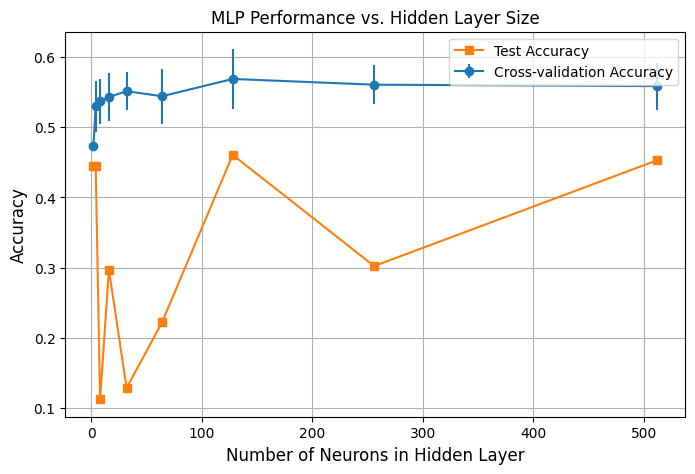

Neurons:   2 | CV Accuracy: 0.473 | Test Accuracy: 0.445
Neurons:   4 | CV Accuracy: 0.530 | Test Accuracy: 0.445
Neurons:   8 | CV Accuracy: 0.537 | Test Accuracy: 0.113
Neurons:  16 | CV Accuracy: 0.543 | Test Accuracy: 0.297
Neurons:  32 | CV Accuracy: 0.551 | Test Accuracy: 0.129
Neurons:  64 | CV Accuracy: 0.544 | Test Accuracy: 0.222
Neurons: 128 | CV Accuracy: 0.569 | Test Accuracy: 0.461
Neurons: 256 | CV Accuracy: 0.561 | Test Accuracy: 0.302
Neurons: 512 | CV Accuracy: 0.558 | Test Accuracy: 0.453


In [59]:
print("Training set score: %f" % mlp.score(X_train_scaled, y_train))

# ---- Plot Results ----
plt.figure(figsize=(8, 5))
plt.errorbar(neurons, cv_scores_mean, yerr=cv_scores_std, fmt='-o', label='Cross-validation Accuracy')
plt.plot(neurons, test_scores, '-s', label='Test Accuracy')
plt.xlabel('Number of Neurons in Hidden Layer', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('MLP Performance vs. Hidden Layer Size')
plt.legend()
plt.grid(True)
plt.show()

# ---- Print Results ----
for n, cv, test in zip(neurons, cv_scores_mean, test_scores):
    print(f"Neurons: {n:3d} | CV Accuracy: {cv:.3f} | Test Accuracy: {test:.3f}")

# Discussion on model performance changes across the range of hyperparameter values (i.e., number of neurons)
The accracy of model increases with an increase in number fo neurons for training dataset wheeras the accuracy is very low (< 0.30) for test data for number of neurons upto 100 and it performs better for number of neurons > 128

# 3. Pick the best performing model (i.e., neurons=128) you found in part 2. Use cross-validation on the same training set to see if using a different activation function would significantly alter the model’s performance. Report and discuss your findings.

In [64]:
#looping over different type of activator with num_mneurons = 128

num_neurons = 128 
activators = ['relu', 'tanh', 'logistic', 'identity']

#variables to comapare results
cv_mean_act = []
cv_std_act = []
test_scores_act = []

for act_type in activators:
    mlp = MLPClassifier(hidden_layer_sizes=(num_neurons,), # hidden layer with num_neurons number of neurons
                        activation = act_type,  # taking different activator types as input
                        # solver='sgd',  # default is Adam
                        alpha=0.01,  # regularization parameter, default is 0.0001 (increase up to 1.0 for stronger regularization)
                        learning_rate_init=.01 ,  # initial step-size for updating the weights, default is 0.001
                        max_iter=100,  # number of epochs, default=200
                        random_state=seed,
                        verbose=1, 
                        )
    scores = cross_val_score(mlp, X_train_scaled, y_train, cv=5, scoring=scoring_method)
    cv_mean_act.append(scores.mean())
    cv_std_act.append(scores.std())
    


    #train the classifier and tesing it
    mlp.fit(X_train, y_train)
    test_acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
    test_scores_act.append(test_acc)

Iteration 1, loss = 1.35207746
Iteration 2, loss = 1.20114026
Iteration 3, loss = 1.19430311
Iteration 4, loss = 1.17601712
Iteration 5, loss = 1.14028711
Iteration 6, loss = 1.12092398
Iteration 7, loss = 1.10877618
Iteration 8, loss = 1.09239377
Iteration 9, loss = 1.08328871
Iteration 10, loss = 1.07707000
Iteration 11, loss = 1.06316849
Iteration 12, loss = 1.06006602
Iteration 13, loss = 1.05095738
Iteration 14, loss = 1.05052041
Iteration 15, loss = 1.04370316
Iteration 16, loss = 1.04083608
Iteration 17, loss = 1.03626173
Iteration 18, loss = 1.03036468
Iteration 19, loss = 1.02984548
Iteration 20, loss = 1.02418689
Iteration 21, loss = 1.02296479
Iteration 22, loss = 1.02000471
Iteration 23, loss = 1.01654628
Iteration 24, loss = 1.01531598
Iteration 25, loss = 1.01205348
Iteration 26, loss = 1.01130755
Iteration 27, loss = 1.01466938
Iteration 28, loss = 1.01074140
Iteration 29, loss = 1.00268170
Iteration 30, loss = 1.00546369
Iteration 31, loss = 1.00016727
Iteration 32, los

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 52, loss = 0.96803514
Iteration 53, loss = 0.95971894
Iteration 54, loss = 0.95837992
Iteration 55, loss = 0.95389601
Iteration 56, loss = 0.96098548
Iteration 57, loss = 0.95407136
Iteration 58, loss = 0.95281232
Iteration 59, loss = 0.94894422
Iteration 60, loss = 0.95053421
Iteration 61, loss = 0.94430849
Iteration 62, loss = 0.94355727
Iteration 63, loss = 0.94518831
Iteration 64, loss = 0.94109489
Iteration 65, loss = 0.94027445
Iteration 66, loss = 0.93890888
Iteration 67, loss = 0.93868536
Iteration 68, loss = 0.93724608
Iteration 69, loss = 0.93422343
Iteration 70, loss = 0.93378840
Iteration 71, loss = 0.93129875
Iteration 72, loss = 0.93372801
Iteration 73, loss = 0.93279722
Iteration 74, loss = 0.92836948
Iteration 75, loss = 0.92928461
Iteration 76, loss = 0.93155710
Iteration 77, loss = 0.92880859
Iteration 78, loss = 0.92564269
Iteration 79, loss = 0.92984379
Iteration 80, loss = 0.92222440
Iteration 81, loss = 0.92891302
Iteration 82, loss = 0.92302527
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 0.97716698
Iteration 46, loss = 0.98025364
Iteration 47, loss = 0.97091475
Iteration 48, loss = 0.97058374
Iteration 49, loss = 0.97078817
Iteration 50, loss = 0.96973286
Iteration 51, loss = 0.96636915
Iteration 52, loss = 0.96271934
Iteration 53, loss = 0.96458687
Iteration 54, loss = 0.96046790
Iteration 55, loss = 0.96519745
Iteration 56, loss = 0.96013347
Iteration 57, loss = 0.95931866
Iteration 58, loss = 0.95611044
Iteration 59, loss = 0.96062297
Iteration 60, loss = 0.94809008
Iteration 61, loss = 0.95332081
Iteration 62, loss = 0.94650540
Iteration 63, loss = 0.94747959
Iteration 64, loss = 0.95053275
Iteration 65, loss = 0.93907736
Iteration 66, loss = 0.94044472
Iteration 67, loss = 0.93929276
Iteration 68, loss = 0.93634357
Iteration 69, loss = 0.93969606
Iteration 70, loss = 0.93508633
Iteration 71, loss = 0.93185177
Iteration 72, loss = 0.93032411
Iteration 73, loss = 0.92923927
Iteration 74, loss = 0.93173634
Iteration 75, loss = 0.92990704
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 25, loss = 1.17704331
Iteration 26, loss = 1.18173119
Iteration 27, loss = 1.20012727
Iteration 28, loss = 1.17037092
Iteration 29, loss = 1.18893823
Iteration 30, loss = 1.16567233
Iteration 31, loss = 1.23959940
Iteration 32, loss = 1.22778303
Iteration 33, loss = 1.17461589
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.32140264
Iteration 2, loss = 1.19418181
Iteration 3, loss = 1.18164091
Iteration 4, loss = 1.14305026
Iteration 5, loss = 1.11563786
Iteration 6, loss = 1.10087035
Iteration 7, loss = 1.08612296
Iteration 8, loss = 1.07755043
Iteration 9, loss = 1.06578562
Iteration 10, loss = 1.06351014
Iteration 11, loss = 1.04765731
Iteration 12, loss = 1.05220387
Iteration 13, loss = 1.04564634
Iteration 14, loss = 1.04426677
Iteration 15, loss = 1.04722048
Iteration 16, loss = 1.04157208
Iteration 17, loss = 1.03827394
Iteration 18, loss = 1.03501249
Iteration 19, loss = 1.03354436
Iteration 20, loss = 1.

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 61, loss = 1.04154884
Iteration 62, loss = 1.03909204
Iteration 63, loss = 1.03540692
Iteration 64, loss = 1.03977337
Iteration 65, loss = 1.03885630
Iteration 66, loss = 1.03539324
Iteration 67, loss = 1.04036045
Iteration 68, loss = 1.04222833
Iteration 69, loss = 1.03635103
Iteration 70, loss = 1.03407955
Iteration 71, loss = 1.03618171
Iteration 72, loss = 1.04045062
Iteration 73, loss = 1.04010269
Iteration 74, loss = 1.03685039
Iteration 75, loss = 1.04281853
Iteration 76, loss = 1.04562037
Iteration 77, loss = 1.04154702
Iteration 78, loss = 1.03290320
Iteration 79, loss = 1.03506766
Iteration 80, loss = 1.03789953
Iteration 81, loss = 1.03871354
Iteration 82, loss = 1.03452970
Iteration 83, loss = 1.03451357
Iteration 84, loss = 1.03564151
Iteration 85, loss = 1.03262830
Iteration 86, loss = 1.03371061
Iteration 87, loss = 1.03451273
Iteration 88, loss = 1.03535810
Iteration 89, loss = 1.03453050
Iteration 90, loss = 1.03117952
Iteration 91, loss = 1.03304270
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 6, loss = 1.08376205
Iteration 7, loss = 1.06635677
Iteration 8, loss = 1.06063306
Iteration 9, loss = 1.04607456
Iteration 10, loss = 1.02681159
Iteration 11, loss = 1.03065087
Iteration 12, loss = 1.02570560
Iteration 13, loss = 1.01675376
Iteration 14, loss = 1.01767592
Iteration 15, loss = 1.01613135
Iteration 16, loss = 1.01457451
Iteration 17, loss = 1.00999254
Iteration 18, loss = 1.00049927
Iteration 19, loss = 1.00052582
Iteration 20, loss = 1.00108360
Iteration 21, loss = 0.99840802
Iteration 22, loss = 0.99937094
Iteration 23, loss = 0.99840138
Iteration 24, loss = 0.99857878
Iteration 25, loss = 0.99879562
Iteration 26, loss = 1.00094445
Iteration 27, loss = 0.99339789
Iteration 28, loss = 0.99455999
Iteration 29, loss = 0.99610253
Iteration 30, loss = 0.99890406
Iteration 31, loss = 0.99517268
Iteration 32, loss = 0.99177154
Iteration 33, loss = 1.00605258
Iteration 34, loss = 0.98976806
Iteration 35, loss = 0.99335717
Iteration 36, loss = 0.99253932
Iteration 37

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


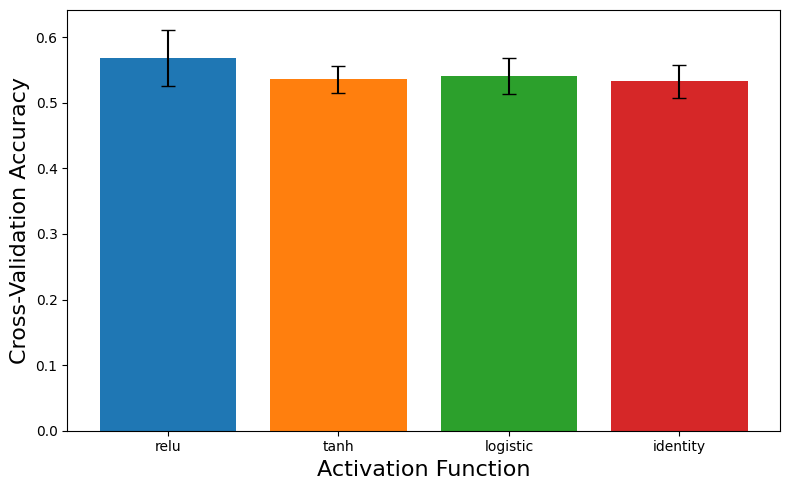


 Best activation function: 'relu' with accuracy = 0.569


In [69]:
# -------- PLOT RESULTS --------
plt.figure(figsize=(8, 5))
plt.bar(activators, cv_mean_act, yerr=cv_std_act, color=['C0', 'C1', 'C2', 'C3'], capsize=5)
plt.xlabel("Activation Function", fontsize=16)
plt.ylabel("Cross-Validation Accuracy", fontsize=16)
#plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Identify best activation
best_idx = np.argmax(cv_mean_act)
print(f"\n Best activation function: '{activators[best_idx]}' with accuracy = {cv_mean_act[best_idx]:.3f}")

# 4. Pick the best performing model you found in part 3. Use cross-validation on the same training set to study the impact on the model’s performance when varying two different hyperparameters for the optimizer (e.g., epoch, batch size, learning rate). Report and discuss whether they make a significant difference for your particular model choice, and how (e.g., speed, score).


In [104]:
#looping over different hyperparameters with 'relu' activator with num_mneurons = 128

num_neurons = 128 
activator = 'relu'

#activators = ['relu', 'tanh', 'logistic', 'identity']
#lrate_type = [ 'constant’, ‘invscaling’, ‘adaptive’ ]
lrate_type = ['constant', 'invscaling', 'adaptive']
lrate_init = [0.0001, 0.001, 0.01]
max_iterations = [100, 200, 300]


#variables to comapare results
cv_mean_act = []
cv_std_act = []
test_scores_act = []

for i in range(len(lrate_init)):
    row_scores = []
    for j in range(len(max_iterations)):
        mlp = MLPClassifier(hidden_layer_sizes=(num_neurons,), # hidden layer with num_neurons number of neurons
                            activation = activator,  # taking different activator types as input
                            solver='sgd',  # default is Adam
                            #earning_rate = lrate_type[i],
                            alpha=0.01,  # regularization parameter, default is 0.0001 (increase up to 1.0 for stronger regularization)
                            learning_rate_init = lrate_init[i] ,  # initial step-size for updating the weights, default is 0.001
                            max_iter = max_iterations[j],  # number of epochs, default=200
                            random_state=seed,
                            verbose=1, 
                            )
        scores = cross_val_score(mlp, X_train_scaled, y_train, cv=5, scoring=scoring_method)
        cv_mean_act.append(scores.mean())
        cv_std_act.append(scores.std())
    
        #train the classifier and tesing it
        mlp.fit(X_train, y_train)
        test_acc = accuracy_score(y_test, mlp.predict(X_test))
        row_scores.append(test_acc)
    test_scores_act.append(row_scores)

Iteration 1, loss = 1.51795934
Iteration 2, loss = 1.51705042
Iteration 3, loss = 1.51563190
Iteration 4, loss = 1.51395390
Iteration 5, loss = 1.51204054
Iteration 6, loss = 1.51006090
Iteration 7, loss = 1.50791726
Iteration 8, loss = 1.50585063
Iteration 9, loss = 1.50365860
Iteration 10, loss = 1.50155956
Iteration 11, loss = 1.49938411
Iteration 12, loss = 1.49722701
Iteration 13, loss = 1.49505249
Iteration 14, loss = 1.49291987
Iteration 15, loss = 1.49084982
Iteration 16, loss = 1.48873433
Iteration 17, loss = 1.48666366
Iteration 18, loss = 1.48461941
Iteration 19, loss = 1.48255723
Iteration 20, loss = 1.48051503
Iteration 21, loss = 1.47854494
Iteration 22, loss = 1.47651625
Iteration 23, loss = 1.47458308
Iteration 24, loss = 1.47256681
Iteration 25, loss = 1.47068022
Iteration 26, loss = 1.46873689
Iteration 27, loss = 1.46685642
Iteration 28, loss = 1.46494032
Iteration 29, loss = 1.46305436
Iteration 30, loss = 1.46121989
Iteration 31, loss = 1.45932861
Iteration 32, los

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 1.51442186
Iteration 5, loss = 1.51247442
Iteration 6, loss = 1.51046279
Iteration 7, loss = 1.50839139
Iteration 8, loss = 1.50626096
Iteration 9, loss = 1.50409802
Iteration 10, loss = 1.50194993
Iteration 11, loss = 1.49979671
Iteration 12, loss = 1.49766518
Iteration 13, loss = 1.49549599
Iteration 14, loss = 1.49341029
Iteration 15, loss = 1.49124916
Iteration 16, loss = 1.48917105
Iteration 17, loss = 1.48710057
Iteration 18, loss = 1.48503989
Iteration 19, loss = 1.48301407
Iteration 20, loss = 1.48095911
Iteration 21, loss = 1.47897518
Iteration 22, loss = 1.47695910
Iteration 23, loss = 1.47498361
Iteration 24, loss = 1.47303393
Iteration 25, loss = 1.47113600
Iteration 26, loss = 1.46918206
Iteration 27, loss = 1.46729072
Iteration 28, loss = 1.46534281
Iteration 29, loss = 1.46350391
Iteration 30, loss = 1.46164176
Iteration 31, loss = 1.45978543
Iteration 32, loss = 1.45793439
Iteration 33, loss = 1.45613312
Iteration 34, loss = 1.45433746
Iteration 35, 

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 64, loss = 1.40772255
Iteration 65, loss = 1.40634034
Iteration 66, loss = 1.40498200
Iteration 67, loss = 1.40361958
Iteration 68, loss = 1.40229981
Iteration 69, loss = 1.40092397
Iteration 70, loss = 1.39961955
Iteration 71, loss = 1.39835256
Iteration 72, loss = 1.39702361
Iteration 73, loss = 1.39573759
Iteration 74, loss = 1.39444929
Iteration 75, loss = 1.39318555
Iteration 76, loss = 1.39193293
Iteration 77, loss = 1.39070166
Iteration 78, loss = 1.38948582
Iteration 79, loss = 1.38825005
Iteration 80, loss = 1.38704569
Iteration 81, loss = 1.38580917
Iteration 82, loss = 1.38462906
Iteration 83, loss = 1.38343646
Iteration 84, loss = 1.38227104
Iteration 85, loss = 1.38111167
Iteration 86, loss = 1.37997868
Iteration 87, loss = 1.37883314
Iteration 88, loss = 1.37767462
Iteration 89, loss = 1.37652335
Iteration 90, loss = 1.37544729
Iteration 91, loss = 1.37431851
Iteration 92, loss = 1.37324322
Iteration 93, loss = 1.37215330
Iteration 94, loss = 1.37107560
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 161, loss = 1.31439741
Iteration 162, loss = 1.31376581
Iteration 163, loss = 1.31313866
Iteration 164, loss = 1.31251368
Iteration 165, loss = 1.31191112
Iteration 166, loss = 1.31127406
Iteration 167, loss = 1.31068174
Iteration 168, loss = 1.31009836
Iteration 169, loss = 1.30948524
Iteration 170, loss = 1.30890608
Iteration 171, loss = 1.30831364
Iteration 172, loss = 1.30773626
Iteration 173, loss = 1.30715298
Iteration 174, loss = 1.30658668
Iteration 175, loss = 1.30599542
Iteration 176, loss = 1.30544603
Iteration 177, loss = 1.30488475
Iteration 178, loss = 1.30431699
Iteration 179, loss = 1.30377691
Iteration 180, loss = 1.30322139
Iteration 181, loss = 1.30268608
Iteration 182, loss = 1.30212880
Iteration 183, loss = 1.30160210
Iteration 184, loss = 1.30106408
Iteration 185, loss = 1.30053443
Iteration 186, loss = 1.30003049
Iteration 187, loss = 1.29947265
Iteration 188, loss = 1.29897014
Iteration 189, loss = 1.29846527
Iteration 190, loss = 1.29794708
Iteration 

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 154, loss = 1.31836552
Iteration 155, loss = 1.31769328
Iteration 156, loss = 1.31702621
Iteration 157, loss = 1.31637886
Iteration 158, loss = 1.31570097
Iteration 159, loss = 1.31506265
Iteration 160, loss = 1.31442575
Iteration 161, loss = 1.31378081
Iteration 162, loss = 1.31314691
Iteration 163, loss = 1.31251975
Iteration 164, loss = 1.31187911
Iteration 165, loss = 1.31128049
Iteration 166, loss = 1.31064055
Iteration 167, loss = 1.31004197
Iteration 168, loss = 1.30943683
Iteration 169, loss = 1.30884291
Iteration 170, loss = 1.30823595
Iteration 171, loss = 1.30763632
Iteration 172, loss = 1.30706306
Iteration 173, loss = 1.30647060
Iteration 174, loss = 1.30589022
Iteration 175, loss = 1.30531152
Iteration 176, loss = 1.30475113
Iteration 177, loss = 1.30417916
Iteration 178, loss = 1.30361122
Iteration 179, loss = 1.30305611
Iteration 180, loss = 1.30248935
Iteration 181, loss = 1.30196056
Iteration 182, loss = 1.30139227
Iteration 183, loss = 1.30085437
Iteration 

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 140, loss = 1.33002734
Iteration 141, loss = 1.32925843
Iteration 142, loss = 1.32854662
Iteration 143, loss = 1.32782172
Iteration 144, loss = 1.32711199
Iteration 145, loss = 1.32637946
Iteration 146, loss = 1.32567331
Iteration 147, loss = 1.32499000
Iteration 148, loss = 1.32429325
Iteration 149, loss = 1.32359555
Iteration 150, loss = 1.32292608
Iteration 151, loss = 1.32224231
Iteration 152, loss = 1.32157131
Iteration 153, loss = 1.32090595
Iteration 154, loss = 1.32025239
Iteration 155, loss = 1.31956593
Iteration 156, loss = 1.31892429
Iteration 157, loss = 1.31828621
Iteration 158, loss = 1.31763651
Iteration 159, loss = 1.31699816
Iteration 160, loss = 1.31638081
Iteration 161, loss = 1.31573297
Iteration 162, loss = 1.31513027
Iteration 163, loss = 1.31451179
Iteration 164, loss = 1.31388313
Iteration 165, loss = 1.31329590
Iteration 166, loss = 1.31265555
Iteration 167, loss = 1.31206431
Iteration 168, loss = 1.31147527
Iteration 169, loss = 1.31088737
Iteration 

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 116, loss = 1.34545044
Iteration 117, loss = 1.34455765
Iteration 118, loss = 1.34364520
Iteration 119, loss = 1.34276185
Iteration 120, loss = 1.34187204
Iteration 121, loss = 1.34099072
Iteration 122, loss = 1.34011049
Iteration 123, loss = 1.33923953
Iteration 124, loss = 1.33840014
Iteration 125, loss = 1.33755511
Iteration 126, loss = 1.33670388
Iteration 127, loss = 1.33586101
Iteration 128, loss = 1.33504385
Iteration 129, loss = 1.33421122
Iteration 130, loss = 1.33339270
Iteration 131, loss = 1.33257340
Iteration 132, loss = 1.33178491
Iteration 133, loss = 1.33097610
Iteration 134, loss = 1.33020387
Iteration 135, loss = 1.32939024
Iteration 136, loss = 1.32861921
Iteration 137, loss = 1.32785514
Iteration 138, loss = 1.32709108
Iteration 139, loss = 1.32631297
Iteration 140, loss = 1.32556433
Iteration 141, loss = 1.32482429
Iteration 142, loss = 1.32406579
Iteration 143, loss = 1.32334367
Iteration 144, loss = 1.32260388
Iteration 145, loss = 1.32189580
Iteration 

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 1.48051503
Iteration 21, loss = 1.47854494
Iteration 22, loss = 1.47651625
Iteration 23, loss = 1.47458308
Iteration 24, loss = 1.47256681
Iteration 25, loss = 1.47068022
Iteration 26, loss = 1.46873689
Iteration 27, loss = 1.46685642
Iteration 28, loss = 1.46494032
Iteration 29, loss = 1.46305436
Iteration 30, loss = 1.46121989
Iteration 31, loss = 1.45932861
Iteration 32, loss = 1.45751655
Iteration 33, loss = 1.45571420
Iteration 34, loss = 1.45390281
Iteration 35, loss = 1.45212043
Iteration 36, loss = 1.45036721
Iteration 37, loss = 1.44859514
Iteration 38, loss = 1.44686068
Iteration 39, loss = 1.44514744
Iteration 40, loss = 1.44340978
Iteration 41, loss = 1.44175367
Iteration 42, loss = 1.44001564
Iteration 43, loss = 1.43838127
Iteration 44, loss = 1.43675793
Iteration 45, loss = 1.43508843
Iteration 46, loss = 1.43345425
Iteration 47, loss = 1.43183976
Iteration 48, loss = 1.43024126
Iteration 49, loss = 1.42866703
Iteration 50, loss = 1.42708343
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 117, loss = 1.34749179
Iteration 118, loss = 1.34658287
Iteration 119, loss = 1.34570628
Iteration 120, loss = 1.34484392
Iteration 121, loss = 1.34398397
Iteration 122, loss = 1.34310832
Iteration 123, loss = 1.34223322
Iteration 124, loss = 1.34141580
Iteration 125, loss = 1.34057366
Iteration 126, loss = 1.33973060
Iteration 127, loss = 1.33892575
Iteration 128, loss = 1.33809081
Iteration 129, loss = 1.33728939
Iteration 130, loss = 1.33646709
Iteration 131, loss = 1.33568700
Iteration 132, loss = 1.33487903
Iteration 133, loss = 1.33408951
Iteration 134, loss = 1.33330347
Iteration 135, loss = 1.33252566
Iteration 136, loss = 1.33176459
Iteration 137, loss = 1.33100142
Iteration 138, loss = 1.33026045
Iteration 139, loss = 1.32948828
Iteration 140, loss = 1.32877348
Iteration 141, loss = 1.32799759
Iteration 142, loss = 1.32730527
Iteration 143, loss = 1.32654594
Iteration 144, loss = 1.32583998
Iteration 145, loss = 1.32511387
Iteration 146, loss = 1.32441035
Iteration 

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 1.50409802
Iteration 10, loss = 1.50194993
Iteration 11, loss = 1.49979671
Iteration 12, loss = 1.49766518
Iteration 13, loss = 1.49549599
Iteration 14, loss = 1.49341029
Iteration 15, loss = 1.49124916
Iteration 16, loss = 1.48917105
Iteration 17, loss = 1.48710057
Iteration 18, loss = 1.48503989
Iteration 19, loss = 1.48301407
Iteration 20, loss = 1.48095911
Iteration 21, loss = 1.47897518
Iteration 22, loss = 1.47695910
Iteration 23, loss = 1.47498361
Iteration 24, loss = 1.47303393
Iteration 25, loss = 1.47113600
Iteration 26, loss = 1.46918206
Iteration 27, loss = 1.46729072
Iteration 28, loss = 1.46534281
Iteration 29, loss = 1.46350391
Iteration 30, loss = 1.46164176
Iteration 31, loss = 1.45978543
Iteration 32, loss = 1.45793439
Iteration 33, loss = 1.45613312
Iteration 34, loss = 1.45433746
Iteration 35, loss = 1.45257448
Iteration 36, loss = 1.45079761
Iteration 37, loss = 1.44901622
Iteration 38, loss = 1.44730687
Iteration 39, loss = 1.44555391
Iteration

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 1.40913149
Iteration 64, loss = 1.40772255
Iteration 65, loss = 1.40634034
Iteration 66, loss = 1.40498200
Iteration 67, loss = 1.40361958
Iteration 68, loss = 1.40229981
Iteration 69, loss = 1.40092397
Iteration 70, loss = 1.39961955
Iteration 71, loss = 1.39835256
Iteration 72, loss = 1.39702361
Iteration 73, loss = 1.39573759
Iteration 74, loss = 1.39444929
Iteration 75, loss = 1.39318555
Iteration 76, loss = 1.39193293
Iteration 77, loss = 1.39070166
Iteration 78, loss = 1.38948582
Iteration 79, loss = 1.38825005
Iteration 80, loss = 1.38704569
Iteration 81, loss = 1.38580917
Iteration 82, loss = 1.38462906
Iteration 83, loss = 1.38343646
Iteration 84, loss = 1.38227104
Iteration 85, loss = 1.38111167
Iteration 86, loss = 1.37997868
Iteration 87, loss = 1.37883314
Iteration 88, loss = 1.37767462
Iteration 89, loss = 1.37652335
Iteration 90, loss = 1.37544729
Iteration 91, loss = 1.37431851
Iteration 92, loss = 1.37324322
Iteration 93, loss = 1.37215330
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 104, loss = 1.35694935
Iteration 105, loss = 1.35596378
Iteration 106, loss = 1.35497172
Iteration 107, loss = 1.35397425
Iteration 108, loss = 1.35299273
Iteration 109, loss = 1.35201727
Iteration 110, loss = 1.35104159
Iteration 111, loss = 1.35011704
Iteration 112, loss = 1.34916402
Iteration 113, loss = 1.34823494
Iteration 114, loss = 1.34728943
Iteration 115, loss = 1.34637504
Iteration 116, loss = 1.34545044
Iteration 117, loss = 1.34455765
Iteration 118, loss = 1.34364520
Iteration 119, loss = 1.34276185
Iteration 120, loss = 1.34187204
Iteration 121, loss = 1.34099072
Iteration 122, loss = 1.34011049
Iteration 123, loss = 1.33923953
Iteration 124, loss = 1.33840014
Iteration 125, loss = 1.33755511
Iteration 126, loss = 1.33670388
Iteration 127, loss = 1.33586101
Iteration 128, loss = 1.33504385
Iteration 129, loss = 1.33421122
Iteration 130, loss = 1.33339270
Iteration 131, loss = 1.33257340
Iteration 132, loss = 1.33178491
Iteration 133, loss = 1.33097610
Iteration 

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 98, loss = 1.20065113
Iteration 99, loss = 1.20030527
Iteration 100, loss = 1.19998327
Iteration 1, loss = 1.51638664
Iteration 2, loss = 1.50736711
Iteration 3, loss = 1.49399211
Iteration 4, loss = 1.47866355
Iteration 5, loss = 1.46212073
Iteration 6, loss = 1.44564054
Iteration 7, loss = 1.42932412
Iteration 8, loss = 1.41424433
Iteration 9, loss = 1.39979458
Iteration 10, loss = 1.38667448
Iteration 11, loss = 1.37414017
Iteration 12, loss = 1.36283308
Iteration 13, loss = 1.35204893
Iteration 14, loss = 1.34278183
Iteration 15, loss = 1.33380194
Iteration 16, loss = 1.32571878
Iteration 17, loss = 1.31842617
Iteration 18, loss = 1.31155628
Iteration 19, loss = 1.30545361
Iteration 20, loss = 1.29961253
Iteration 21, loss = 1.29436458
Iteration 22, loss = 1.28938742
Iteration 23, loss = 1.28495989
Iteration 24, loss = 1.28066616
Iteration 25, loss = 1.27677221
Iteration 26, loss = 1.27324415
Iteration 27, loss = 1.26998107
Iteration 28, loss = 1.26662618
Iteration 29, lo

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 88, loss = 1.20168140
Iteration 89, loss = 1.20127977
Iteration 90, loss = 1.20089712
Iteration 91, loss = 1.20047924
Iteration 92, loss = 1.20009922
Iteration 93, loss = 1.19973291
Iteration 94, loss = 1.19933435
Iteration 95, loss = 1.19897441
Iteration 96, loss = 1.19859759
Iteration 97, loss = 1.19822930
Iteration 98, loss = 1.19786687
Iteration 99, loss = 1.19751827
Iteration 100, loss = 1.19720267
Iteration 1, loss = 1.51671839
Iteration 2, loss = 1.50780971
Iteration 3, loss = 1.49449152
Iteration 4, loss = 1.47918269
Iteration 5, loss = 1.46241506
Iteration 6, loss = 1.44606751
Iteration 7, loss = 1.43024196
Iteration 8, loss = 1.41477240
Iteration 9, loss = 1.40071365
Iteration 10, loss = 1.38724291
Iteration 11, loss = 1.37491654
Iteration 12, loss = 1.36376219
Iteration 13, loss = 1.35325884
Iteration 14, loss = 1.34409639
Iteration 15, loss = 1.33486373
Iteration 16, loss = 1.32704845
Iteration 17, loss = 1.31979794
Iteration 18, loss = 1.31287635
Iteration 19, lo

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 79, loss = 1.20160109
Iteration 80, loss = 1.20116483
Iteration 81, loss = 1.20066445
Iteration 82, loss = 1.20016928
Iteration 83, loss = 1.19971691
Iteration 84, loss = 1.19925218
Iteration 85, loss = 1.19876986
Iteration 86, loss = 1.19832598
Iteration 87, loss = 1.19791482
Iteration 88, loss = 1.19743813
Iteration 89, loss = 1.19702086
Iteration 90, loss = 1.19663284
Iteration 91, loss = 1.19619468
Iteration 92, loss = 1.19575879
Iteration 93, loss = 1.19536619
Iteration 94, loss = 1.19496111
Iteration 95, loss = 1.19458278
Iteration 96, loss = 1.19416552
Iteration 97, loss = 1.19378228
Iteration 98, loss = 1.19340761
Iteration 99, loss = 1.19301350
Iteration 100, loss = 1.19264954
Iteration 1, loss = 12.11038895
Iteration 2, loss = 9.91049475
Iteration 3, loss = 11.25404468
Iteration 4, loss = 5.38341809
Iteration 5, loss = 1.56362076
Iteration 6, loss = 1.37188245
Iteration 7, loss = 1.28953992
Iteration 8, loss = 1.24433680
Iteration 9, loss = 1.23540936
Iteration 10, 

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, loss = 1.21245355
Iteration 71, loss = 1.21188515
Iteration 72, loss = 1.21141635
Iteration 73, loss = 1.21087479
Iteration 74, loss = 1.21035251
Iteration 75, loss = 1.20982347
Iteration 76, loss = 1.20936054
Iteration 77, loss = 1.20885372
Iteration 78, loss = 1.20839168
Iteration 79, loss = 1.20795491
Iteration 80, loss = 1.20753976
Iteration 81, loss = 1.20706378
Iteration 82, loss = 1.20659065
Iteration 83, loss = 1.20619502
Iteration 84, loss = 1.20577514
Iteration 85, loss = 1.20537597
Iteration 86, loss = 1.20496525
Iteration 87, loss = 1.20455003
Iteration 88, loss = 1.20420071
Iteration 89, loss = 1.20381923
Iteration 90, loss = 1.20342788
Iteration 91, loss = 1.20306057
Iteration 92, loss = 1.20269870
Iteration 93, loss = 1.20231686
Iteration 94, loss = 1.20201677
Iteration 95, loss = 1.20164070
Iteration 96, loss = 1.20128635
Iteration 97, loss = 1.20100607
Iteration 98, loss = 1.20065113
Iteration 99, loss = 1.20030527
Iteration 100, loss = 1.19998327
Iterati

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 48, loss = 1.22814803
Iteration 49, loss = 1.22702474
Iteration 50, loss = 1.22586926
Iteration 51, loss = 1.22491483
Iteration 52, loss = 1.22389634
Iteration 53, loss = 1.22293036
Iteration 54, loss = 1.22197797
Iteration 55, loss = 1.22108776
Iteration 56, loss = 1.22023966
Iteration 57, loss = 1.21944647
Iteration 58, loss = 1.21856300
Iteration 59, loss = 1.21779182
Iteration 60, loss = 1.21706912
Iteration 61, loss = 1.21629368
Iteration 62, loss = 1.21553760
Iteration 63, loss = 1.21485706
Iteration 64, loss = 1.21418196
Iteration 65, loss = 1.21349631
Iteration 66, loss = 1.21283445
Iteration 67, loss = 1.21221404
Iteration 68, loss = 1.21160077
Iteration 69, loss = 1.21096500
Iteration 70, loss = 1.21038836
Iteration 71, loss = 1.20985542
Iteration 72, loss = 1.20926367
Iteration 73, loss = 1.20871479
Iteration 74, loss = 1.20818492
Iteration 75, loss = 1.20764297
Iteration 76, loss = 1.20710579
Iteration 77, loss = 1.20663355
Iteration 78, loss = 1.20613394
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 65, loss = 1.20971044
Iteration 66, loss = 1.20906584
Iteration 67, loss = 1.20842250
Iteration 68, loss = 1.20776264
Iteration 69, loss = 1.20711559
Iteration 70, loss = 1.20658084
Iteration 71, loss = 1.20596337
Iteration 72, loss = 1.20537628
Iteration 73, loss = 1.20483401
Iteration 74, loss = 1.20423110
Iteration 75, loss = 1.20369574
Iteration 76, loss = 1.20318831
Iteration 77, loss = 1.20264705
Iteration 78, loss = 1.20210804
Iteration 79, loss = 1.20160109
Iteration 80, loss = 1.20116483
Iteration 81, loss = 1.20066445
Iteration 82, loss = 1.20016928
Iteration 83, loss = 1.19971691
Iteration 84, loss = 1.19925218
Iteration 85, loss = 1.19876986
Iteration 86, loss = 1.19832598
Iteration 87, loss = 1.19791482
Iteration 88, loss = 1.19743813
Iteration 89, loss = 1.19702086
Iteration 90, loss = 1.19663284
Iteration 91, loss = 1.19619468
Iteration 92, loss = 1.19575879
Iteration 93, loss = 1.19536619
Iteration 94, loss = 1.19496111
Iteration 95, loss = 1.19458278
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 1.46212073
Iteration 6, loss = 1.44564054
Iteration 7, loss = 1.42932412
Iteration 8, loss = 1.41424433
Iteration 9, loss = 1.39979458
Iteration 10, loss = 1.38667448
Iteration 11, loss = 1.37414017
Iteration 12, loss = 1.36283308
Iteration 13, loss = 1.35204893
Iteration 14, loss = 1.34278183
Iteration 15, loss = 1.33380194
Iteration 16, loss = 1.32571878
Iteration 17, loss = 1.31842617
Iteration 18, loss = 1.31155628
Iteration 19, loss = 1.30545361
Iteration 20, loss = 1.29961253
Iteration 21, loss = 1.29436458
Iteration 22, loss = 1.28938742
Iteration 23, loss = 1.28495989
Iteration 24, loss = 1.28066616
Iteration 25, loss = 1.27677221
Iteration 26, loss = 1.27324415
Iteration 27, loss = 1.26998107
Iteration 28, loss = 1.26662618
Iteration 29, loss = 1.26373827
Iteration 30, loss = 1.26098675
Iteration 31, loss = 1.25831170
Iteration 32, loss = 1.25580962
Iteration 33, loss = 1.25354954
Iteration 34, loss = 1.25146682
Iteration 35, loss = 1.24927663
Iteration 36,

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 138, loss = 1.18594267
Iteration 139, loss = 1.18566970
Iteration 140, loss = 1.18542209
Iteration 141, loss = 1.18516448
Iteration 142, loss = 1.18491211
Iteration 143, loss = 1.18463351
Iteration 144, loss = 1.18438439
Iteration 145, loss = 1.18414504
Iteration 146, loss = 1.18389406
Iteration 147, loss = 1.18363432
Iteration 148, loss = 1.18336891
Iteration 149, loss = 1.18315459
Iteration 150, loss = 1.18287334
Iteration 151, loss = 1.18264534
Iteration 152, loss = 1.18238885
Iteration 153, loss = 1.18213317
Iteration 154, loss = 1.18189095
Iteration 155, loss = 1.18163921
Iteration 156, loss = 1.18139948
Iteration 157, loss = 1.18115603
Iteration 158, loss = 1.18090418
Iteration 159, loss = 1.18066580
Iteration 160, loss = 1.18043266
Iteration 161, loss = 1.18019024
Iteration 162, loss = 1.17996268
Iteration 163, loss = 1.17969754
Iteration 164, loss = 1.17946236
Iteration 165, loss = 1.17922788
Iteration 166, loss = 1.17898691
Iteration 167, loss = 1.17876547
Iteration 

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 48, loss = 1.23253189
Iteration 49, loss = 1.23142268
Iteration 50, loss = 1.23034679
Iteration 51, loss = 1.22942315
Iteration 52, loss = 1.22844441
Iteration 53, loss = 1.22753510
Iteration 54, loss = 1.22665698
Iteration 55, loss = 1.22578117
Iteration 56, loss = 1.22496966
Iteration 57, loss = 1.22420247
Iteration 58, loss = 1.22339056
Iteration 59, loss = 1.22265582
Iteration 60, loss = 1.22199224
Iteration 61, loss = 1.22125521
Iteration 62, loss = 1.22059452
Iteration 63, loss = 1.21992539
Iteration 64, loss = 1.21926499
Iteration 65, loss = 1.21865871
Iteration 66, loss = 1.21805712
Iteration 67, loss = 1.21745897
Iteration 68, loss = 1.21688859
Iteration 69, loss = 1.21635710
Iteration 70, loss = 1.21578504
Iteration 71, loss = 1.21530385
Iteration 72, loss = 1.21474238
Iteration 73, loss = 1.21425062
Iteration 74, loss = 1.21380159
Iteration 75, loss = 1.21327349
Iteration 76, loss = 1.21280513
Iteration 77, loss = 1.21235929
Iteration 78, loss = 1.21193177
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 129, loss = 1.18303564
Iteration 130, loss = 1.18273148
Iteration 131, loss = 1.18244992
Iteration 132, loss = 1.18214864
Iteration 133, loss = 1.18184319
Iteration 134, loss = 1.18155604
Iteration 135, loss = 1.18126482
Iteration 136, loss = 1.18098094
Iteration 137, loss = 1.18067923
Iteration 138, loss = 1.18040499
Iteration 139, loss = 1.18011458
Iteration 140, loss = 1.17981837
Iteration 141, loss = 1.17955124
Iteration 142, loss = 1.17927462
Iteration 143, loss = 1.17898300
Iteration 144, loss = 1.17868868
Iteration 145, loss = 1.17842285
Iteration 146, loss = 1.17814354
Iteration 147, loss = 1.17787433
Iteration 148, loss = 1.17759599
Iteration 149, loss = 1.17731202
Iteration 150, loss = 1.17703239
Iteration 151, loss = 1.17677132
Iteration 152, loss = 1.17650111
Iteration 153, loss = 1.17621659
Iteration 154, loss = 1.17594835
Iteration 155, loss = 1.17567169
Iteration 156, loss = 1.17545835
Iteration 157, loss = 1.17514288
Iteration 158, loss = 1.17490316
Iteration 

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 1.18730858
Iteration 31, loss = 1.18680363
Iteration 32, loss = 1.18461644
Iteration 33, loss = 1.18452222
Iteration 34, loss = 1.18253349
Iteration 35, loss = 1.17998144
Iteration 36, loss = 1.18057745
Iteration 37, loss = 1.17913177
Iteration 38, loss = 1.18041665
Iteration 39, loss = 1.17718568
Iteration 40, loss = 1.17794106
Iteration 41, loss = 1.17605756
Iteration 42, loss = 1.17566083
Iteration 43, loss = 1.17744720
Iteration 44, loss = 1.17506495
Iteration 45, loss = 1.17163821
Iteration 46, loss = 1.17414944
Iteration 47, loss = 1.17157716
Iteration 48, loss = 1.17140303
Iteration 49, loss = 1.17323485
Iteration 50, loss = 1.16843229
Iteration 51, loss = 1.16762759
Iteration 52, loss = 1.16959749
Iteration 53, loss = 1.17053201
Iteration 54, loss = 1.16464276
Iteration 55, loss = 1.16688398
Iteration 56, loss = 1.16495001
Iteration 57, loss = 1.17012212
Iteration 58, loss = 1.16556476
Iteration 59, loss = 1.16306272
Iteration 60, loss = 1.16244335
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 65, loss = 1.10418169
Iteration 66, loss = 1.10296441
Iteration 67, loss = 1.10199996
Iteration 68, loss = 1.10130565
Iteration 69, loss = 1.10003285
Iteration 70, loss = 1.09912893
Iteration 71, loss = 1.09833414
Iteration 72, loss = 1.09731422
Iteration 73, loss = 1.09636466
Iteration 74, loss = 1.09553965
Iteration 75, loss = 1.09495089
Iteration 76, loss = 1.09385803
Iteration 77, loss = 1.09306523
Iteration 78, loss = 1.09217621
Iteration 79, loss = 1.09164752
Iteration 80, loss = 1.09065440
Iteration 81, loss = 1.08976123
Iteration 82, loss = 1.08915268
Iteration 83, loss = 1.08829057
Iteration 84, loss = 1.08780120
Iteration 85, loss = 1.08681043
Iteration 86, loss = 1.08616233
Iteration 87, loss = 1.08582023
Iteration 88, loss = 1.08473916
Iteration 89, loss = 1.08410801
Iteration 90, loss = 1.08349611
Iteration 91, loss = 1.08280474
Iteration 92, loss = 1.08215946
Iteration 93, loss = 1.08178509
Iteration 94, loss = 1.08092636
Iteration 95, loss = 1.08024795
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 1.10028564
Iteration 56, loss = 1.09863323
Iteration 57, loss = 1.09727083
Iteration 58, loss = 1.09572172
Iteration 59, loss = 1.09440372
Iteration 60, loss = 1.09352364
Iteration 61, loss = 1.09180537
Iteration 62, loss = 1.09043338
Iteration 63, loss = 1.08896739
Iteration 64, loss = 1.08792410
Iteration 65, loss = 1.08647909
Iteration 66, loss = 1.08523542
Iteration 67, loss = 1.08429361
Iteration 68, loss = 1.08300171
Iteration 69, loss = 1.08195146
Iteration 70, loss = 1.08076961
Iteration 71, loss = 1.07964249
Iteration 72, loss = 1.07863600
Iteration 73, loss = 1.07764179
Iteration 74, loss = 1.07664894
Iteration 75, loss = 1.07553062
Iteration 76, loss = 1.07465482
Iteration 77, loss = 1.07373274
Iteration 78, loss = 1.07267282
Iteration 79, loss = 1.07177092
Iteration 80, loss = 1.07125957
Iteration 81, loss = 1.07014525
Iteration 82, loss = 1.06938552
Iteration 83, loss = 1.06843274
Iteration 84, loss = 1.06783804
Iteration 85, loss = 1.06693387
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 83, loss = 1.08811939
Iteration 84, loss = 1.08698501
Iteration 85, loss = 1.08635557
Iteration 86, loss = 1.08546708
Iteration 87, loss = 1.08477211
Iteration 88, loss = 1.08378598
Iteration 89, loss = 1.08322349
Iteration 90, loss = 1.08221743
Iteration 91, loss = 1.08146266
Iteration 92, loss = 1.08064838
Iteration 93, loss = 1.08042361
Iteration 94, loss = 1.07929674
Iteration 95, loss = 1.07850579
Iteration 96, loss = 1.07780113
Iteration 97, loss = 1.07732816
Iteration 98, loss = 1.07660085
Iteration 99, loss = 1.07606939
Iteration 100, loss = 1.07509805
Iteration 101, loss = 1.07436025
Iteration 102, loss = 1.07399418
Iteration 103, loss = 1.07319585
Iteration 104, loss = 1.07244974
Iteration 105, loss = 1.07195547
Iteration 106, loss = 1.07141605
Iteration 107, loss = 1.07086147
Iteration 108, loss = 1.07004548
Iteration 109, loss = 1.06951657
Iteration 110, loss = 1.06931163
Iteration 111, loss = 1.06853758
Iteration 112, loss = 1.06797489
Iteration 113, loss = 1.067

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 89, loss = 1.10155432
Iteration 90, loss = 1.10054645
Iteration 91, loss = 1.09993169
Iteration 92, loss = 1.09926913
Iteration 93, loss = 1.09868532
Iteration 94, loss = 1.09794506
Iteration 95, loss = 1.09725257
Iteration 96, loss = 1.09661535
Iteration 97, loss = 1.09628142
Iteration 98, loss = 1.09535977
Iteration 99, loss = 1.09473611
Iteration 100, loss = 1.09406605
Iteration 101, loss = 1.09356483
Iteration 102, loss = 1.09321538
Iteration 103, loss = 1.09243863
Iteration 104, loss = 1.09194545
Iteration 105, loss = 1.09118424
Iteration 106, loss = 1.09058185
Iteration 107, loss = 1.09005877
Iteration 108, loss = 1.08968295
Iteration 109, loss = 1.08922379
Iteration 110, loss = 1.08869055
Iteration 111, loss = 1.08792558
Iteration 112, loss = 1.08757396
Iteration 113, loss = 1.08713979
Iteration 114, loss = 1.08647504
Iteration 115, loss = 1.08614719
Iteration 116, loss = 1.08555477
Iteration 117, loss = 1.08497027
Iteration 118, loss = 1.08479061
Iteration 119, loss =

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 1.15647633
Iteration 35, loss = 1.15457149
Iteration 36, loss = 1.15286976
Iteration 37, loss = 1.15120144
Iteration 38, loss = 1.14946293
Iteration 39, loss = 1.14791988
Iteration 40, loss = 1.14630636
Iteration 41, loss = 1.14495326
Iteration 42, loss = 1.14342064
Iteration 43, loss = 1.14144499
Iteration 44, loss = 1.14041578
Iteration 45, loss = 1.13856614
Iteration 46, loss = 1.13712823
Iteration 47, loss = 1.13569953
Iteration 48, loss = 1.13420544
Iteration 49, loss = 1.13275052
Iteration 50, loss = 1.13146173
Iteration 51, loss = 1.13019700
Iteration 52, loss = 1.12900778
Iteration 53, loss = 1.12740129
Iteration 54, loss = 1.12602723
Iteration 55, loss = 1.12470829
Iteration 56, loss = 1.12357860
Iteration 57, loss = 1.12233616
Iteration 58, loss = 1.12101670
Iteration 59, loss = 1.11992827
Iteration 60, loss = 1.11853886
Iteration 61, loss = 1.11741575
Iteration 62, loss = 1.11622408
Iteration 63, loss = 1.11506399
Iteration 64, loss = 1.11393119
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 144, loss = 1.05347795
Iteration 145, loss = 1.05307020
Iteration 146, loss = 1.05268499
Iteration 147, loss = 1.05235024
Iteration 148, loss = 1.05199986
Iteration 149, loss = 1.05169041
Iteration 150, loss = 1.05141852
Iteration 151, loss = 1.05144885
Iteration 152, loss = 1.05071687
Iteration 153, loss = 1.05047851
Iteration 154, loss = 1.05039874
Iteration 155, loss = 1.04999647
Iteration 156, loss = 1.04960162
Iteration 157, loss = 1.04917727
Iteration 158, loss = 1.04898735
Iteration 159, loss = 1.04862601
Iteration 160, loss = 1.04832603
Iteration 161, loss = 1.04802512
Iteration 162, loss = 1.04780428
Iteration 163, loss = 1.04745265
Iteration 164, loss = 1.04728726
Iteration 165, loss = 1.04691086
Iteration 166, loss = 1.04664828
Iteration 167, loss = 1.04665131
Iteration 168, loss = 1.04614946
Iteration 169, loss = 1.04616084
Iteration 170, loss = 1.04536704
Iteration 171, loss = 1.04535617
Iteration 172, loss = 1.04500138
Iteration 173, loss = 1.04500399
Iteration 

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 57, loss = 1.11314367
Iteration 58, loss = 1.11196685
Iteration 59, loss = 1.11085319
Iteration 60, loss = 1.10977080
Iteration 61, loss = 1.10889616
Iteration 62, loss = 1.10726085
Iteration 63, loss = 1.10656140
Iteration 64, loss = 1.10529195
Iteration 65, loss = 1.10418169
Iteration 66, loss = 1.10296441
Iteration 67, loss = 1.10199996
Iteration 68, loss = 1.10130565
Iteration 69, loss = 1.10003285
Iteration 70, loss = 1.09912893
Iteration 71, loss = 1.09833414
Iteration 72, loss = 1.09731422
Iteration 73, loss = 1.09636466
Iteration 74, loss = 1.09553965
Iteration 75, loss = 1.09495089
Iteration 76, loss = 1.09385803
Iteration 77, loss = 1.09306523
Iteration 78, loss = 1.09217621
Iteration 79, loss = 1.09164752
Iteration 80, loss = 1.09065440
Iteration 81, loss = 1.08976123
Iteration 82, loss = 1.08915268
Iteration 83, loss = 1.08829057
Iteration 84, loss = 1.08780120
Iteration 85, loss = 1.08681043
Iteration 86, loss = 1.08616233
Iteration 87, loss = 1.08582023
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 147, loss = 1.07338641
Iteration 148, loss = 1.07299610
Iteration 149, loss = 1.07259116
Iteration 150, loss = 1.07224273
Iteration 151, loss = 1.07229031
Iteration 152, loss = 1.07194865
Iteration 153, loss = 1.07121870
Iteration 154, loss = 1.07099776
Iteration 155, loss = 1.07077948
Iteration 156, loss = 1.07054682
Iteration 157, loss = 1.07026259
Iteration 158, loss = 1.06989198
Iteration 159, loss = 1.06955632
Iteration 160, loss = 1.06929865
Iteration 161, loss = 1.06910477
Iteration 162, loss = 1.06878813
Iteration 163, loss = 1.06851587
Iteration 164, loss = 1.06817569
Iteration 165, loss = 1.06802464
Iteration 166, loss = 1.06770460
Iteration 167, loss = 1.06769632
Iteration 168, loss = 1.06735298
Iteration 169, loss = 1.06669309
Iteration 170, loss = 1.06650619
Iteration 171, loss = 1.06646415
Iteration 172, loss = 1.06615328
Iteration 173, loss = 1.06584059
Iteration 174, loss = 1.06549840
Iteration 175, loss = 1.06538232
Iteration 176, loss = 1.06510018
Iteration 

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 47, loss = 1.11323901
Iteration 48, loss = 1.11189668
Iteration 49, loss = 1.10976950
Iteration 50, loss = 1.10814222
Iteration 51, loss = 1.10632653
Iteration 52, loss = 1.10492890
Iteration 53, loss = 1.10325056
Iteration 54, loss = 1.10164049
Iteration 55, loss = 1.10028564
Iteration 56, loss = 1.09863323
Iteration 57, loss = 1.09727083
Iteration 58, loss = 1.09572172
Iteration 59, loss = 1.09440372
Iteration 60, loss = 1.09352364
Iteration 61, loss = 1.09180537
Iteration 62, loss = 1.09043338
Iteration 63, loss = 1.08896739
Iteration 64, loss = 1.08792410
Iteration 65, loss = 1.08647909
Iteration 66, loss = 1.08523542
Iteration 67, loss = 1.08429361
Iteration 68, loss = 1.08300171
Iteration 69, loss = 1.08195146
Iteration 70, loss = 1.08076961
Iteration 71, loss = 1.07964249
Iteration 72, loss = 1.07863600
Iteration 73, loss = 1.07764179
Iteration 74, loss = 1.07664894
Iteration 75, loss = 1.07553062
Iteration 76, loss = 1.07465482
Iteration 77, loss = 1.07373274
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [110]:
print(f'{test_scores_act}')

max_score = 0 
 
for i in range(len(lrate_init)):
    for j in range(len(max_iterations)):
        if test_scores_act[i][j] > max_score:
            max_score = test_scores_act[i][j]
            a = i
            b = j
        print(f'Learning rate: {lrate_init[i]}, max_iterations: {max_iterations[j]}, score: {test_scores_act[i][j]} ')
#print(f'{max_score}, {lrate_init[a]}, {max_iterations[b]}')

[[0.44344703770197486, 0.44344703770197486, 0.44344703770197486], [0.45370607848166195, 0.45370607848166195, 0.45370607848166195], [0.4467812259553732, 0.4467812259553732, 0.4467812259553732]]
Learning rate: 0.0001, max_iterations: 100, score: 0.44344703770197486 
Learning rate: 0.0001, max_iterations: 200, score: 0.44344703770197486 
Learning rate: 0.0001, max_iterations: 300, score: 0.44344703770197486 
Learning rate: 0.001, max_iterations: 100, score: 0.45370607848166195 
Learning rate: 0.001, max_iterations: 200, score: 0.45370607848166195 
Learning rate: 0.001, max_iterations: 300, score: 0.45370607848166195 
Learning rate: 0.01, max_iterations: 100, score: 0.4467812259553732 
Learning rate: 0.01, max_iterations: 200, score: 0.4467812259553732 
Learning rate: 0.01, max_iterations: 300, score: 0.4467812259553732 


# The model performance changes with different hyperparameters. For the selected hyperparameters, the best performance was observed for Learning rate: 0.001 and the change in max_iterations did not affect the scores.

# 5. Now use cross-validation to train and tune an MLPClassifier model that adds a second hidden layer to the best model from parts 2 - 4. Report and discuss how model performance changes across the range of new hyperparameter values (i.e., number of neurons for the second layer) and compare it to the single layer model. 

In [134]:
#looping over different type of activator with num_mneurons = 128

num_neurons = 128 
activator = 'relu'

second_layer_neurons = [2, 4, 8, 16, 32, 64, 128, 256, 512]

#Variables for 1st layer
cv_mean = []
cv_std  = []
test_scores = []

#variables to comapare results after adding 2nd layer
cv_mean_2nd = []
cv_std_2nd = []
test_scores_2nd = []

#MLPClassifier for 1 layer
mlp1 = MLPClassifier(hidden_layer_sizes=(num_neurons), # hidden layer with num_neurons number of neurons
                        activation = activator,  # taking different activator types as input
                        # solver='sgd',  # default is Adam
                        alpha=0.01,  # regularization parameter, default is 0.0001 (increase up to 1.0 for stronger regularization)
                        learning_rate_init=.01 ,  # initial step-size for updating the weights, default is 0.001
                        max_iter=100,  # number of epochs, default=200
                        random_state=seed,
                        verbose=1, 
                        )
scores = cross_val_score(mlp1, X_train_scaled, y_train, cv=5, scoring=scoring_method)
cv_mean.append(scores.mean())
cv_std.append(scores.std())

#train the classifier and tesing it
mlp1.fit(X_train, y_train)
test_acc = accuracy_score(y_test, mlp1.predict(X_test_scaled))
test_scores.append(test_acc)

#Printing results for 1 layer
print(f"Single-layer model (neurons={num_neurons}): CV accuracy = {test_acc:.4f}")

for num_layers in second_layer_neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(num_neurons, num_layers), # hidden layer with num_neurons number of neurons
                        activation = activator,  # taking different activator types as input
                        # solver='sgd',  # default is Adam
                        alpha=0.01,  # regularization parameter, default is 0.0001 (increase up to 1.0 for stronger regularization)
                        learning_rate_init=.01 ,  # initial step-size for updating the weights, default is 0.001
                        max_iter=100,  # number of epochs, default=200
                        random_state=seed,
                        verbose=1, 
                        )
    scores = cross_val_score(mlp, X_train_scaled, y_train, cv=5, scoring=scoring_method)
    cv_mean_2nd.append(scores.mean())
    cv_std_2nd.append(scores.std())
    
    # in case the training won't converge we catch the warning and ignore it
    from sklearn.exceptions import ConvergenceWarning
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        
        #train the classifier and tesing it
        mlp.fit(X_train, y_train)
    test_acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
    test_scores_2nd.append(test_acc)
    print(f"Two-layer model ({num_neurons}, {num_layers}): CV accuracy = {test_acc:.3f}")

Iteration 1, loss = 1.35207746
Iteration 2, loss = 1.20114026
Iteration 3, loss = 1.19430311
Iteration 4, loss = 1.17601712
Iteration 5, loss = 1.14028711
Iteration 6, loss = 1.12092398
Iteration 7, loss = 1.10877618
Iteration 8, loss = 1.09239377
Iteration 9, loss = 1.08328871
Iteration 10, loss = 1.07707000
Iteration 11, loss = 1.06316849
Iteration 12, loss = 1.06006602
Iteration 13, loss = 1.05095738
Iteration 14, loss = 1.05052041
Iteration 15, loss = 1.04370316
Iteration 16, loss = 1.04083608
Iteration 17, loss = 1.03626173
Iteration 18, loss = 1.03036468
Iteration 19, loss = 1.02984548
Iteration 20, loss = 1.02418689
Iteration 21, loss = 1.02296479
Iteration 22, loss = 1.02000471
Iteration 23, loss = 1.01654628
Iteration 24, loss = 1.01531598
Iteration 25, loss = 1.01205348
Iteration 26, loss = 1.01130755
Iteration 27, loss = 1.01466938
Iteration 28, loss = 1.01074140
Iteration 29, loss = 1.00268170
Iteration 30, loss = 1.00546369
Iteration 31, loss = 1.00016727
Iteration 32, los

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 1.12945806
Iteration 6, loss = 1.10882178
Iteration 7, loss = 1.09489350
Iteration 8, loss = 1.07733149
Iteration 9, loss = 1.07149938
Iteration 10, loss = 1.06048251
Iteration 11, loss = 1.05232045
Iteration 12, loss = 1.05081001
Iteration 13, loss = 1.04579321
Iteration 14, loss = 1.03739829
Iteration 15, loss = 1.03388467
Iteration 16, loss = 1.03360993
Iteration 17, loss = 1.02714111
Iteration 18, loss = 1.02508005
Iteration 19, loss = 1.02159185
Iteration 20, loss = 1.02473422
Iteration 21, loss = 1.01909490
Iteration 22, loss = 1.01584336
Iteration 23, loss = 1.01741605
Iteration 24, loss = 1.02203109
Iteration 25, loss = 1.01717853
Iteration 26, loss = 1.01344830
Iteration 27, loss = 1.01976435
Iteration 28, loss = 1.00698228
Iteration 29, loss = 1.01241702
Iteration 30, loss = 1.00967991
Iteration 31, loss = 1.00679880
Iteration 32, loss = 1.00997367
Iteration 33, loss = 1.00243578
Iteration 34, loss = 0.99987389
Iteration 35, loss = 0.99965687
Iteration 36,

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 15, loss = 1.01350518
Iteration 16, loss = 1.01181808
Iteration 17, loss = 1.00433843
Iteration 18, loss = 0.99781887
Iteration 19, loss = 0.99743084
Iteration 20, loss = 0.99505105
Iteration 21, loss = 0.99170361
Iteration 22, loss = 0.99017007
Iteration 23, loss = 0.98792305
Iteration 24, loss = 0.98582776
Iteration 25, loss = 0.98593584
Iteration 26, loss = 0.98510214
Iteration 27, loss = 0.97748977
Iteration 28, loss = 0.97801406
Iteration 29, loss = 0.97750777
Iteration 30, loss = 0.97760500
Iteration 31, loss = 0.97371066
Iteration 32, loss = 0.96958327
Iteration 33, loss = 0.97921288
Iteration 34, loss = 0.96415351
Iteration 35, loss = 0.96642234
Iteration 36, loss = 0.96454386
Iteration 37, loss = 0.96466299
Iteration 38, loss = 0.96491283
Iteration 39, loss = 0.96260801
Iteration 40, loss = 0.95815022
Iteration 41, loss = 0.95713513
Iteration 42, loss = 0.95326790
Iteration 43, loss = 0.95016863
Iteration 44, loss = 0.94751129
Iteration 45, loss = 0.94671636
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 1.21648742
Iteration 7, loss = 1.20853933
Iteration 8, loss = 1.20248191
Iteration 9, loss = 1.19874489
Iteration 10, loss = 1.19301304
Iteration 11, loss = 1.18872389
Iteration 12, loss = 1.18405270
Iteration 13, loss = 1.18142915
Iteration 14, loss = 1.17717367
Iteration 15, loss = 1.17406461
Iteration 16, loss = 1.16984098
Iteration 17, loss = 1.16871395
Iteration 18, loss = 1.16468377
Iteration 19, loss = 1.15904677
Iteration 20, loss = 1.15711874
Iteration 21, loss = 1.15269300
Iteration 22, loss = 1.14785067
Iteration 23, loss = 1.14385962
Iteration 24, loss = 1.13931086
Iteration 25, loss = 1.13525694
Iteration 26, loss = 1.13180206
Iteration 27, loss = 1.12567378
Iteration 28, loss = 1.12917331
Iteration 29, loss = 1.12808369
Iteration 30, loss = 1.11595974
Iteration 31, loss = 1.10958782
Iteration 32, loss = 1.10962444
Iteration 33, loss = 1.10115804
Iteration 34, loss = 1.09756921
Iteration 35, loss = 1.09108597
Iteration 36, loss = 1.09220125
Iteration 37

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 82, loss = 0.94125700
Iteration 83, loss = 0.93219825
Iteration 84, loss = 0.93384257
Iteration 85, loss = 0.93006919
Iteration 86, loss = 0.92934737
Iteration 87, loss = 0.93064611
Iteration 88, loss = 0.93037292
Iteration 89, loss = 0.93070587
Iteration 90, loss = 0.93063994
Iteration 91, loss = 0.92502509
Iteration 92, loss = 0.91999521
Iteration 93, loss = 0.92705922
Iteration 94, loss = 0.92510796
Iteration 95, loss = 0.93769647
Iteration 96, loss = 0.94059003
Iteration 97, loss = 0.93655303
Iteration 98, loss = 0.92712521
Iteration 99, loss = 0.92101068
Iteration 100, loss = 0.91400598
Iteration 1, loss = 1.35303214
Iteration 2, loss = 1.29218405
Iteration 3, loss = 1.25705084
Iteration 4, loss = 1.23218801
Iteration 5, loss = 1.21426438
Iteration 6, loss = 1.20461226
Iteration 7, loss = 1.19537788
Iteration 8, loss = 1.18280425
Iteration 9, loss = 1.16931267
Iteration 10, loss = 1.15646111
Iteration 11, loss = 1.14396787
Iteration 12, loss = 1.12883957
Iteration 13, lo

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 40, loss = 1.22530544
Iteration 41, loss = 1.22520181
Iteration 42, loss = 1.22498710
Iteration 43, loss = 1.22496361
Iteration 44, loss = 1.22471735
Iteration 45, loss = 1.22464641
Iteration 46, loss = 1.22455798
Iteration 47, loss = 1.22442502
Iteration 48, loss = 1.22436068
Iteration 49, loss = 1.22430161
Iteration 50, loss = 1.22425887
Iteration 51, loss = 1.22418355
Iteration 52, loss = 1.22416184
Iteration 53, loss = 1.22413176
Iteration 54, loss = 1.22406087
Iteration 55, loss = 1.22398475
Iteration 56, loss = 1.22396330
Iteration 57, loss = 1.22391387
Iteration 58, loss = 1.22388437
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Two-layer model (128, 2): CV accuracy = 0.445
Iteration 1, loss = 1.31710391
Iteration 2, loss = 1.25116591
Iteration 3, loss = 1.22910434
Iteration 4, loss = 1.20989223
Iteration 5, loss = 1.20592600
Iteration 6, loss = 1.20173787
Iteration 7, loss = 1.19568826
Iteration 8, loss = 1.18981305
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 1.07725573
Iteration 35, loss = 1.07881060
Iteration 36, loss = 1.07836249
Iteration 37, loss = 1.08538033
Iteration 38, loss = 1.08345129
Iteration 39, loss = 1.07006593
Iteration 40, loss = 1.07232492
Iteration 41, loss = 1.06421921
Iteration 42, loss = 1.06033206
Iteration 43, loss = 1.06311114
Iteration 44, loss = 1.05763789
Iteration 45, loss = 1.05800817
Iteration 46, loss = 1.06076941
Iteration 47, loss = 1.05054327
Iteration 48, loss = 1.05177453
Iteration 49, loss = 1.05282380
Iteration 50, loss = 1.04437426
Iteration 51, loss = 1.04224709
Iteration 52, loss = 1.04051392
Iteration 53, loss = 1.03844186
Iteration 54, loss = 1.03493884
Iteration 55, loss = 1.03601234
Iteration 56, loss = 1.03542317
Iteration 57, loss = 1.03079567
Iteration 58, loss = 1.02637001
Iteration 59, loss = 1.02926080
Iteration 60, loss = 1.03003025
Iteration 61, loss = 1.03173119
Iteration 62, loss = 1.03011285
Iteration 63, loss = 1.01707601
Iteration 64, loss = 1.01994099
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 97, loss = 0.93347815
Iteration 98, loss = 0.92124143
Iteration 99, loss = 0.92119248
Iteration 100, loss = 0.92032503
Iteration 1, loss = 3.55528059
Iteration 2, loss = 1.34554953
Iteration 3, loss = 1.32913969
Iteration 4, loss = 1.32724491
Iteration 5, loss = 1.30290996
Iteration 6, loss = 1.32193249
Iteration 7, loss = 1.28271500
Iteration 8, loss = 1.27373667
Iteration 9, loss = 1.26613159
Iteration 10, loss = 1.25936915
Iteration 11, loss = 1.25396437
Iteration 12, loss = 1.24890463
Iteration 13, loss = 1.24449359
Iteration 14, loss = 1.24102590
Iteration 15, loss = 1.23827828
Iteration 16, loss = 1.23600443
Iteration 17, loss = 1.23387913
Iteration 18, loss = 1.23257724
Iteration 19, loss = 1.23130252
Iteration 20, loss = 1.22998669
Iteration 21, loss = 1.22915216
Iteration 22, loss = 1.22840982
Iteration 23, loss = 1.22783035
Iteration 24, loss = 1.22724526
Iteration 25, loss = 1.22685269
Iteration 26, loss = 1.22641956
Iteration 27, loss = 1.22611837
Iteration 28, lo

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 1.14276759
Iteration 6, loss = 1.12706533
Iteration 7, loss = 1.10323895
Iteration 8, loss = 1.07642749
Iteration 9, loss = 1.07194852
Iteration 10, loss = 1.06991621
Iteration 11, loss = 1.06422128
Iteration 12, loss = 1.05776712
Iteration 13, loss = 1.05068169
Iteration 14, loss = 1.05259718
Iteration 15, loss = 1.04643315
Iteration 16, loss = 1.04560367
Iteration 17, loss = 1.04174415
Iteration 18, loss = 1.03680272
Iteration 19, loss = 1.03586346
Iteration 20, loss = 1.03363660
Iteration 21, loss = 1.03733992
Iteration 22, loss = 1.02718709
Iteration 23, loss = 1.02556345
Iteration 24, loss = 1.02369159
Iteration 25, loss = 1.02084607
Iteration 26, loss = 1.02506035
Iteration 27, loss = 1.02558505
Iteration 28, loss = 1.02728625
Iteration 29, loss = 1.03803347
Iteration 30, loss = 1.02135065
Iteration 31, loss = 1.02668145
Iteration 32, loss = 1.01531564
Iteration 33, loss = 1.00968958
Iteration 34, loss = 1.00653356
Iteration 35, loss = 1.00780612
Iteration 36,

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 1.10037898
Iteration 7, loss = 1.08844094
Iteration 8, loss = 1.07090084
Iteration 9, loss = 1.06297864
Iteration 10, loss = 1.04657675
Iteration 11, loss = 1.04132276
Iteration 12, loss = 1.03434258
Iteration 13, loss = 1.03181995
Iteration 14, loss = 1.03319386
Iteration 15, loss = 1.02771896
Iteration 16, loss = 1.01935017
Iteration 17, loss = 1.02065529
Iteration 18, loss = 1.02087121
Iteration 19, loss = 1.01278971
Iteration 20, loss = 1.01090730
Iteration 21, loss = 1.00667356
Iteration 22, loss = 1.00285152
Iteration 23, loss = 1.00121353
Iteration 24, loss = 0.99674366
Iteration 25, loss = 0.99657036
Iteration 26, loss = 0.99474068
Iteration 27, loss = 0.99943664
Iteration 28, loss = 0.99936894
Iteration 29, loss = 0.99516292
Iteration 30, loss = 0.98971194
Iteration 31, loss = 0.99831447
Iteration 32, loss = 0.99172746
Iteration 33, loss = 0.98104260
Iteration 34, loss = 0.98127641
Iteration 35, loss = 0.97685777
Iteration 36, loss = 0.97981378
Iteration 37

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 22, loss = 1.02730674
Iteration 23, loss = 1.02734170
Iteration 24, loss = 1.02314347
Iteration 25, loss = 1.01433140
Iteration 26, loss = 1.01297975
Iteration 27, loss = 1.01017654
Iteration 28, loss = 1.00887931
Iteration 29, loss = 1.00747188
Iteration 30, loss = 1.00125284
Iteration 31, loss = 0.99789086
Iteration 32, loss = 0.99619183
Iteration 33, loss = 0.99170418
Iteration 34, loss = 0.99107198
Iteration 35, loss = 0.99123652
Iteration 36, loss = 0.98608161
Iteration 37, loss = 0.99174993
Iteration 38, loss = 0.99043968
Iteration 39, loss = 0.98181726
Iteration 40, loss = 0.97648061
Iteration 41, loss = 0.97887087
Iteration 42, loss = 0.97377573
Iteration 43, loss = 0.97281663
Iteration 44, loss = 0.97826811
Iteration 45, loss = 0.97936255
Iteration 46, loss = 0.98270426
Iteration 47, loss = 0.97225300
Iteration 48, loss = 0.96358390
Iteration 49, loss = 0.96537621
Iteration 50, loss = 0.96125159
Iteration 51, loss = 0.96075035
Iteration 52, loss = 0.96093278
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 50, loss = 0.95594376
Iteration 51, loss = 0.95217628
Iteration 52, loss = 0.95463857
Iteration 53, loss = 0.94768747
Iteration 54, loss = 0.94349436
Iteration 55, loss = 0.94587080
Iteration 56, loss = 0.94149811
Iteration 57, loss = 0.93927572
Iteration 58, loss = 0.93664931
Iteration 59, loss = 0.93570173
Iteration 60, loss = 0.93300521
Iteration 61, loss = 0.93223353
Iteration 62, loss = 0.93250854
Iteration 63, loss = 0.93328731
Iteration 64, loss = 0.93078933
Iteration 65, loss = 0.91945226
Iteration 66, loss = 0.92657296
Iteration 67, loss = 0.91872301
Iteration 68, loss = 0.91566941
Iteration 69, loss = 0.91907340
Iteration 70, loss = 0.91015525
Iteration 71, loss = 0.90985371
Iteration 72, loss = 0.91022643
Iteration 73, loss = 0.90938041
Iteration 74, loss = 0.90559698
Iteration 75, loss = 0.90665257
Iteration 76, loss = 0.90137269
Iteration 77, loss = 0.89911720
Iteration 78, loss = 0.91902789
Iteration 79, loss = 0.92512455
Iteration 80, loss = 0.91425804
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 10, loss = 1.20652843
Iteration 11, loss = 1.19785783
Iteration 12, loss = 1.20672560
Iteration 13, loss = 1.19102470
Iteration 14, loss = 1.18922705
Iteration 15, loss = 1.20204524
Iteration 16, loss = 1.20698414
Iteration 17, loss = 1.20674981
Iteration 18, loss = 1.20270249
Iteration 19, loss = 1.19401316
Iteration 20, loss = 1.18004566
Iteration 21, loss = 1.18101651
Iteration 22, loss = 1.16914916
Iteration 23, loss = 1.16653693
Iteration 24, loss = 1.16449112
Iteration 25, loss = 1.16068495
Iteration 26, loss = 1.16213065
Iteration 27, loss = 1.15472278
Iteration 28, loss = 1.17883561
Iteration 29, loss = 1.15387070
Iteration 30, loss = 1.15101172
Iteration 31, loss = 1.17695534
Iteration 32, loss = 1.17389804
Iteration 33, loss = 1.18033695
Iteration 34, loss = 1.14882046
Iteration 35, loss = 1.14831140
Iteration 36, loss = 1.17443811
Iteration 37, loss = 1.15309577
Iteration 38, loss = 1.17728211
Iteration 39, loss = 1.18061747
Iteration 40, loss = 1.19072349
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.42007238
Iteration 2, loss = 1.24789525
Iteration 3, loss = 1.22002496
Iteration 4, loss = 1.19804456
Iteration 5, loss = 1.16981201
Iteration 6, loss = 1.14686419
Iteration 7, loss = 1.11566659
Iteration 8, loss = 1.09273356
Iteration 9, loss = 1.06709490
Iteration 10, loss = 1.05313360
Iteration 11, loss = 1.04192298
Iteration 12, loss = 1.03962274
Iteration 13, loss = 1.03113513
Iteration 14, loss = 1.03123419
Iteration 15, loss = 1.02533251
Iteration 16, loss = 1.02339546
Iteration 17, loss = 1.02405921
Iteration 18, loss = 1.02117989
Iteration 19, loss = 1.01523677
Iteration 20, loss = 1.01190357
Iteration 21, loss = 1.00467219
Iteration 22, loss = 1.00337862
Iteration 23, loss = 1.00195421
Iteration 24, loss = 1.00242886
Iteration 25, loss = 0.99875655
Iteration 26, loss = 0.99629878
Iteration 27, loss = 0.99344910
Iteration 28, loss = 1.00496874
Iteration 29, loss = 1.00008480
Iteration 30, loss = 0.99626174
Iteration 31, loss = 0.98571309
Iteration 32, los

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 86, loss = 0.87017699
Iteration 87, loss = 0.86238111
Iteration 88, loss = 0.86510362
Iteration 89, loss = 0.85490834
Iteration 90, loss = 0.85881864
Iteration 91, loss = 0.85203208
Iteration 92, loss = 0.85297756
Iteration 93, loss = 0.85506365
Iteration 94, loss = 0.84944356
Iteration 95, loss = 0.85722410
Iteration 96, loss = 0.85109142
Iteration 97, loss = 0.86034225
Iteration 98, loss = 0.86263074
Iteration 99, loss = 0.85681723
Iteration 100, loss = 0.84248385
Iteration 1, loss = 1.41886803
Iteration 2, loss = 1.24595237
Iteration 3, loss = 1.22732779
Iteration 4, loss = 1.19766709
Iteration 5, loss = 1.17038030
Iteration 6, loss = 1.14987915
Iteration 7, loss = 1.10842480
Iteration 8, loss = 1.07895027
Iteration 9, loss = 1.05268447
Iteration 10, loss = 1.03797549
Iteration 11, loss = 1.03075747
Iteration 12, loss = 1.02175901
Iteration 13, loss = 1.01354252
Iteration 14, loss = 1.01031451
Iteration 15, loss = 1.00592065
Iteration 16, loss = 1.00280107
Iteration 17, lo

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 21, loss = 1.23638658
Iteration 22, loss = 1.22299509
Iteration 23, loss = 1.21955878
Iteration 24, loss = 1.21645544
Iteration 25, loss = 1.22200305
Iteration 26, loss = 1.21553253
Iteration 27, loss = 1.21887101
Iteration 28, loss = 1.21346995
Iteration 29, loss = 1.21165914
Iteration 30, loss = 1.21484769
Iteration 31, loss = 1.21421134
Iteration 32, loss = 1.20754302
Iteration 33, loss = 1.20619746
Iteration 34, loss = 1.20870477
Iteration 35, loss = 1.21102625
Iteration 36, loss = 1.20731645
Iteration 37, loss = 1.20442479
Iteration 38, loss = 1.20431390
Iteration 39, loss = 1.20986236
Iteration 40, loss = 1.22950925
Iteration 41, loss = 1.21333829
Iteration 42, loss = 1.21143493
Iteration 43, loss = 1.20318494
Iteration 44, loss = 1.20491269
Iteration 45, loss = 1.20675862
Iteration 46, loss = 1.20693655
Iteration 47, loss = 1.20752378
Iteration 48, loss = 1.22734186
Iteration 49, loss = 1.24745674
Iteration 50, loss = 1.24151940
Iteration 51, loss = 1.22418646
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 50, loss = 0.91620044
Iteration 51, loss = 0.91397803
Iteration 52, loss = 0.90937289
Iteration 53, loss = 0.90491594
Iteration 54, loss = 0.89716825
Iteration 55, loss = 0.91253943
Iteration 56, loss = 0.92390815
Iteration 57, loss = 0.90776227
Iteration 58, loss = 0.91823136
Iteration 59, loss = 0.90568894
Iteration 60, loss = 0.90265113
Iteration 61, loss = 0.90531979
Iteration 62, loss = 0.90646857
Iteration 63, loss = 0.90757226
Iteration 64, loss = 0.90031527
Iteration 65, loss = 0.88696089
Iteration 66, loss = 0.87736406
Iteration 67, loss = 0.87864188
Iteration 68, loss = 0.87381752
Iteration 69, loss = 0.87498552
Iteration 70, loss = 0.87381825
Iteration 71, loss = 0.86747656
Iteration 72, loss = 0.86720633
Iteration 73, loss = 0.86070551
Iteration 74, loss = 0.85842134
Iteration 75, loss = 0.85324951
Iteration 76, loss = 0.85306662
Iteration 77, loss = 0.86512285
Iteration 78, loss = 0.84578487
Iteration 79, loss = 0.84029032
Iteration 80, loss = 0.84593681
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 84, loss = 0.82868433
Iteration 85, loss = 0.83620491
Iteration 86, loss = 0.83285354
Iteration 87, loss = 0.81757006
Iteration 88, loss = 0.83256792
Iteration 89, loss = 0.82429866
Iteration 90, loss = 0.80610629
Iteration 91, loss = 0.80457809
Iteration 92, loss = 0.80317723
Iteration 93, loss = 0.80066696
Iteration 94, loss = 0.79735635
Iteration 95, loss = 0.79500586
Iteration 96, loss = 0.79230020
Iteration 97, loss = 0.81493388
Iteration 98, loss = 0.79646476
Iteration 99, loss = 0.80151737
Iteration 100, loss = 0.79154243
Iteration 1, loss = 1.47042893
Iteration 2, loss = 1.22416140
Iteration 3, loss = 1.18205226
Iteration 4, loss = 1.11662666
Iteration 5, loss = 1.09774657
Iteration 6, loss = 1.07045861
Iteration 7, loss = 1.06590483
Iteration 8, loss = 1.04479884
Iteration 9, loss = 1.03009442
Iteration 10, loss = 1.02893194
Iteration 11, loss = 1.02429011
Iteration 12, loss = 1.01402074
Iteration 13, loss = 1.00319474
Iteration 14, loss = 1.00578219
Iteration 15, lo

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 23, loss = 0.96370724
Iteration 24, loss = 0.95234631
Iteration 25, loss = 0.94807941
Iteration 26, loss = 0.93989484
Iteration 27, loss = 0.94294871
Iteration 28, loss = 0.93559722
Iteration 29, loss = 0.92089716
Iteration 30, loss = 0.92228841
Iteration 31, loss = 0.92087952
Iteration 32, loss = 0.94004722
Iteration 33, loss = 0.92929953
Iteration 34, loss = 0.90907483
Iteration 35, loss = 0.90212322
Iteration 36, loss = 0.89474888
Iteration 37, loss = 0.89401135
Iteration 38, loss = 0.90035472
Iteration 39, loss = 0.88889106
Iteration 40, loss = 0.88581215
Iteration 41, loss = 0.87615269
Iteration 42, loss = 0.87480642
Iteration 43, loss = 0.86869607
Iteration 44, loss = 0.86434503
Iteration 45, loss = 0.86769862
Iteration 46, loss = 0.85663902
Iteration 47, loss = 0.85282917
Iteration 48, loss = 0.84987782
Iteration 49, loss = 0.84462133
Iteration 50, loss = 0.84467058
Iteration 51, loss = 0.84497077
Iteration 52, loss = 0.84170285
Iteration 53, loss = 0.85551365
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 1.13349566
Iteration 4, loss = 1.09773681
Iteration 5, loss = 1.10599008
Iteration 6, loss = 1.08158401
Iteration 7, loss = 1.05785383
Iteration 8, loss = 1.04529719
Iteration 9, loss = 1.03837260
Iteration 10, loss = 1.02524156
Iteration 11, loss = 1.01843047
Iteration 12, loss = 1.01250602
Iteration 13, loss = 1.00354271
Iteration 14, loss = 0.99754113
Iteration 15, loss = 1.00582025
Iteration 16, loss = 0.99912972
Iteration 17, loss = 0.98266812
Iteration 18, loss = 0.98803380
Iteration 19, loss = 0.98281111
Iteration 20, loss = 0.97535574
Iteration 21, loss = 0.96075223
Iteration 22, loss = 0.96413195
Iteration 23, loss = 0.97220809
Iteration 24, loss = 0.95758420
Iteration 25, loss = 0.94721004
Iteration 26, loss = 0.95356946
Iteration 27, loss = 0.98069804
Iteration 28, loss = 0.95453406
Iteration 29, loss = 0.96222192
Iteration 30, loss = 0.95761730
Iteration 31, loss = 0.94663357
Iteration 32, loss = 0.93194419
Iteration 33, loss = 0.93015929
Iteration 34, l

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 0.85543238
Iteration 50, loss = 0.84039145
Iteration 51, loss = 0.83226662
Iteration 52, loss = 0.83478790
Iteration 53, loss = 0.83334217
Iteration 54, loss = 0.81892673
Iteration 55, loss = 0.83532694
Iteration 56, loss = 0.81118549
Iteration 57, loss = 0.80661464
Iteration 58, loss = 0.81416398
Iteration 59, loss = 0.81398175
Iteration 60, loss = 0.82043667
Iteration 61, loss = 0.80773623
Iteration 62, loss = 0.79240017
Iteration 63, loss = 0.79491869
Iteration 64, loss = 0.79162272
Iteration 65, loss = 0.78775477
Iteration 66, loss = 0.78484993
Iteration 67, loss = 0.77221274
Iteration 68, loss = 0.76182156
Iteration 69, loss = 0.75659119
Iteration 70, loss = 0.77554310
Iteration 71, loss = 0.78796096
Iteration 72, loss = 0.77356886
Iteration 73, loss = 0.77355020
Iteration 74, loss = 0.75432397
Iteration 75, loss = 0.73137827
Iteration 76, loss = 0.73425964
Iteration 77, loss = 0.73287234
Iteration 78, loss = 0.76036748
Iteration 79, loss = 0.72579461
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 31, loss = 0.92676995
Iteration 32, loss = 0.93151040
Iteration 33, loss = 0.94436949
Iteration 34, loss = 0.93386253
Iteration 35, loss = 0.93040270
Iteration 36, loss = 0.91198105
Iteration 37, loss = 0.91370865
Iteration 38, loss = 0.89085614
Iteration 39, loss = 0.88523426
Iteration 40, loss = 0.89404158
Iteration 41, loss = 0.89431251
Iteration 42, loss = 0.89489392
Iteration 43, loss = 0.88703440
Iteration 44, loss = 0.87140145
Iteration 45, loss = 0.86629467
Iteration 46, loss = 0.86362727
Iteration 47, loss = 0.86313987
Iteration 48, loss = 0.86977915
Iteration 49, loss = 0.85002230
Iteration 50, loss = 0.85605616
Iteration 51, loss = 0.84155133
Iteration 52, loss = 0.83803506
Iteration 53, loss = 0.84334232
Iteration 54, loss = 0.84190200
Iteration 55, loss = 0.83606101
Iteration 56, loss = 0.82603258
Iteration 57, loss = 0.82229030
Iteration 58, loss = 0.83372779
Iteration 59, loss = 0.83416468
Iteration 60, loss = 0.81697935
Iteration 61, loss = 0.81256252
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.99901115
Iteration 12, loss = 1.00841581
Iteration 13, loss = 1.00392194
Iteration 14, loss = 0.99226811
Iteration 15, loss = 0.97638754
Iteration 16, loss = 0.97093836
Iteration 17, loss = 0.96531918
Iteration 18, loss = 0.96222682
Iteration 19, loss = 0.96742877
Iteration 20, loss = 0.94582202
Iteration 21, loss = 0.93863095
Iteration 22, loss = 0.94123604
Iteration 23, loss = 0.93868324
Iteration 24, loss = 0.93531780
Iteration 25, loss = 0.92737481
Iteration 26, loss = 0.92368246
Iteration 27, loss = 0.91881897
Iteration 28, loss = 0.92513552
Iteration 29, loss = 0.91753314
Iteration 30, loss = 0.91966472
Iteration 31, loss = 0.92185860
Iteration 32, loss = 0.92843269
Iteration 33, loss = 0.91084234
Iteration 34, loss = 0.92591627
Iteration 35, loss = 0.91079932
Iteration 36, loss = 0.91292572
Iteration 37, loss = 0.90050303
Iteration 38, loss = 0.90842532
Iteration 39, loss = 0.90027869
Iteration 40, loss = 0.90195802
Iteration 41, loss = 0.88530867
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 57, loss = 1.05068637
Iteration 58, loss = 1.04741886
Iteration 59, loss = 1.02910853
Iteration 60, loss = 1.04108936
Iteration 61, loss = 1.05564265
Iteration 62, loss = 1.02237743
Iteration 63, loss = 1.04001455
Iteration 64, loss = 1.08426042
Iteration 65, loss = 1.09084433
Iteration 66, loss = 1.05296662
Iteration 67, loss = 1.10059098
Iteration 68, loss = 1.06803367
Iteration 69, loss = 1.04162778
Iteration 70, loss = 1.05432161
Iteration 71, loss = 1.05867020
Iteration 72, loss = 1.04087435
Iteration 73, loss = 1.01562922
Iteration 74, loss = 1.02242354
Iteration 75, loss = 1.03982520
Iteration 76, loss = 1.04775031
Iteration 77, loss = 1.01958508
Iteration 78, loss = 1.01323952
Iteration 79, loss = 1.02225936
Iteration 80, loss = 1.01380456
Iteration 81, loss = 1.02057373
Iteration 82, loss = 1.02039861
Iteration 83, loss = 1.06171472
Iteration 84, loss = 1.07074647
Iteration 85, loss = 1.08907221
Iteration 86, loss = 1.04245543
Iteration 87, loss = 1.02991046
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 28, loss = 0.94651441
Iteration 29, loss = 0.92251643
Iteration 30, loss = 0.91699039
Iteration 31, loss = 0.90412965
Iteration 32, loss = 0.90159133
Iteration 33, loss = 0.89673526
Iteration 34, loss = 0.89225603
Iteration 35, loss = 0.88814722
Iteration 36, loss = 0.88316637
Iteration 37, loss = 0.87996099
Iteration 38, loss = 0.87529686
Iteration 39, loss = 0.86807874
Iteration 40, loss = 0.87055442
Iteration 41, loss = 0.88891361
Iteration 42, loss = 0.86929482
Iteration 43, loss = 0.87347283
Iteration 44, loss = 0.86792804
Iteration 45, loss = 0.86960532
Iteration 46, loss = 0.84860955
Iteration 47, loss = 0.83573379
Iteration 48, loss = 0.83345572
Iteration 49, loss = 0.83479986
Iteration 50, loss = 0.82485217
Iteration 51, loss = 0.81802637
Iteration 52, loss = 0.82066583
Iteration 53, loss = 0.81352430
Iteration 54, loss = 0.81210171
Iteration 55, loss = 0.81810680
Iteration 56, loss = 0.81215579
Iteration 57, loss = 0.80503526
Iteration 58, loss = 0.78778142
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 35, loss = 0.89307416
Iteration 36, loss = 0.87230253
Iteration 37, loss = 0.88714285
Iteration 38, loss = 0.88091830
Iteration 39, loss = 0.86641522
Iteration 40, loss = 0.86396871
Iteration 41, loss = 0.84725608
Iteration 42, loss = 0.85604005
Iteration 43, loss = 0.84515485
Iteration 44, loss = 0.83067156
Iteration 45, loss = 0.83296289
Iteration 46, loss = 0.83488315
Iteration 47, loss = 0.84107961
Iteration 48, loss = 0.83011344
Iteration 49, loss = 0.82410928
Iteration 50, loss = 0.81335492
Iteration 51, loss = 0.80066730
Iteration 52, loss = 0.79145962
Iteration 53, loss = 0.79284053
Iteration 54, loss = 0.79570524
Iteration 55, loss = 0.78283659
Iteration 56, loss = 0.77746587
Iteration 57, loss = 0.77171328
Iteration 58, loss = 0.76523252
Iteration 59, loss = 0.76515268
Iteration 60, loss = 0.76510513
Iteration 61, loss = 0.74168016
Iteration 62, loss = 0.73582630
Iteration 63, loss = 0.74970501
Iteration 64, loss = 0.73722884
Iteration 65, loss = 0.75462320
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 43, loss = 0.85528104
Iteration 44, loss = 0.84846562
Iteration 45, loss = 0.84158025
Iteration 46, loss = 0.84844374
Iteration 47, loss = 0.84502908
Iteration 48, loss = 0.85704824
Iteration 49, loss = 0.84791834
Iteration 50, loss = 0.82697171
Iteration 51, loss = 0.81855842
Iteration 52, loss = 0.82238690
Iteration 53, loss = 0.80886634
Iteration 54, loss = 0.82586300
Iteration 55, loss = 0.81408857
Iteration 56, loss = 0.81963680
Iteration 57, loss = 0.81749188
Iteration 58, loss = 0.79370729
Iteration 59, loss = 0.78578541
Iteration 60, loss = 0.77425798
Iteration 61, loss = 0.76099686
Iteration 62, loss = 0.75107077
Iteration 63, loss = 0.76274579
Iteration 64, loss = 0.77068756
Iteration 65, loss = 0.77238826
Iteration 66, loss = 0.74618816
Iteration 67, loss = 0.72993294
Iteration 68, loss = 0.72649566
Iteration 69, loss = 0.72070961
Iteration 70, loss = 0.71910642
Iteration 71, loss = 0.69949854
Iteration 72, loss = 0.71086067
Iteration 73, loss = 0.70833491
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 0.80644979
Iteration 54, loss = 0.80951668
Iteration 55, loss = 0.78408459
Iteration 56, loss = 0.78771017
Iteration 57, loss = 0.78330381
Iteration 58, loss = 0.78188231
Iteration 59, loss = 0.77095669
Iteration 60, loss = 0.77351225
Iteration 61, loss = 0.77271237
Iteration 62, loss = 0.77477093
Iteration 63, loss = 0.76860825
Iteration 64, loss = 0.76894626
Iteration 65, loss = 0.77412739
Iteration 66, loss = 0.76879423
Iteration 67, loss = 0.72626576
Iteration 68, loss = 0.73249597
Iteration 69, loss = 0.71460758
Iteration 70, loss = 0.71980394
Iteration 71, loss = 0.71417558
Iteration 72, loss = 0.70333779
Iteration 73, loss = 0.70450887
Iteration 74, loss = 0.69219004
Iteration 75, loss = 0.68635251
Iteration 76, loss = 0.70847343
Iteration 77, loss = 0.69268455
Iteration 78, loss = 0.68748125
Iteration 79, loss = 0.67180673
Iteration 80, loss = 0.68125308
Iteration 81, loss = 0.68023852
Iteration 82, loss = 0.66308161
Iteration 83, loss = 0.64843650
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 1.04881956
Iteration 6, loss = 1.02767667
Iteration 7, loss = 1.01138087
Iteration 8, loss = 1.00190248
Iteration 9, loss = 0.99657114
Iteration 10, loss = 0.99670797
Iteration 11, loss = 0.98506602
Iteration 12, loss = 0.97536729
Iteration 13, loss = 0.97620858
Iteration 14, loss = 0.98302998
Iteration 15, loss = 0.98157613
Iteration 16, loss = 0.96382124
Iteration 17, loss = 0.95061584
Iteration 18, loss = 0.94464165
Iteration 19, loss = 0.94865342
Iteration 20, loss = 0.94093209
Iteration 21, loss = 0.94094557
Iteration 22, loss = 0.92725093
Iteration 23, loss = 0.92636498
Iteration 24, loss = 0.91833121
Iteration 25, loss = 0.91850530
Iteration 26, loss = 0.91843252
Iteration 27, loss = 0.90323188
Iteration 28, loss = 0.89809338
Iteration 29, loss = 0.89034016
Iteration 30, loss = 0.88899023
Iteration 31, loss = 0.88163486
Iteration 32, loss = 0.88625796
Iteration 33, loss = 0.86904234
Iteration 34, loss = 0.87682897
Iteration 35, loss = 0.87260303
Iteration 36,

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 1.04527908
Iteration 46, loss = 1.05606991
Iteration 47, loss = 1.07109954
Iteration 48, loss = 1.07133304
Iteration 49, loss = 1.03522544
Iteration 50, loss = 1.03021535
Iteration 51, loss = 1.03266948
Iteration 52, loss = 1.02392342
Iteration 53, loss = 1.05194062
Iteration 54, loss = 1.05222120
Iteration 55, loss = 1.03517112
Iteration 56, loss = 1.03949365
Iteration 57, loss = 1.04402173
Iteration 58, loss = 1.02979594
Iteration 59, loss = 1.01616381
Iteration 60, loss = 1.02417395
Iteration 61, loss = 1.01063796
Iteration 62, loss = 1.04314510
Iteration 63, loss = 1.05870573
Iteration 64, loss = 1.03536587
Iteration 65, loss = 1.03218915
Iteration 66, loss = 1.03942795
Iteration 67, loss = 1.04235839
Iteration 68, loss = 1.03953939
Iteration 69, loss = 1.02297674
Iteration 70, loss = 0.99914556
Iteration 71, loss = 0.99327878
Iteration 72, loss = 1.01469775
Iteration 73, loss = 1.05133410
Iteration 74, loss = 1.02157142
Iteration 75, loss = 1.00649762
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 33, loss = 0.89422119
Iteration 34, loss = 0.87883878
Iteration 35, loss = 0.88989832
Iteration 36, loss = 0.88909944
Iteration 37, loss = 0.86482080
Iteration 38, loss = 0.86902105
Iteration 39, loss = 0.86646571
Iteration 40, loss = 0.85969509
Iteration 41, loss = 0.84774395
Iteration 42, loss = 0.84947340
Iteration 43, loss = 0.84027926
Iteration 44, loss = 0.82561917
Iteration 45, loss = 0.82620567
Iteration 46, loss = 0.82771676
Iteration 47, loss = 0.80732344
Iteration 48, loss = 0.80584939
Iteration 49, loss = 0.80153667
Iteration 50, loss = 0.78664332
Iteration 51, loss = 0.78013176
Iteration 52, loss = 0.78578907
Iteration 53, loss = 0.77546807
Iteration 54, loss = 0.78720178
Iteration 55, loss = 0.76373308
Iteration 56, loss = 0.75982982
Iteration 57, loss = 0.73878593
Iteration 58, loss = 0.75044773
Iteration 59, loss = 0.77351876
Iteration 60, loss = 0.75698384
Iteration 61, loss = 0.74101025
Iteration 62, loss = 0.75677297
Iteration 63, loss = 0.75828742
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 32, loss = 0.86734824
Iteration 33, loss = 0.86125890
Iteration 34, loss = 0.85562089
Iteration 35, loss = 0.85094193
Iteration 36, loss = 0.84332322
Iteration 37, loss = 0.82973779
Iteration 38, loss = 0.84243385
Iteration 39, loss = 0.84922049
Iteration 40, loss = 0.86964448
Iteration 41, loss = 0.86147961
Iteration 42, loss = 0.84781596
Iteration 43, loss = 0.83625521
Iteration 44, loss = 0.81951268
Iteration 45, loss = 0.81395625
Iteration 46, loss = 0.80804447
Iteration 47, loss = 0.80199959
Iteration 48, loss = 0.78817987
Iteration 49, loss = 0.77957245
Iteration 50, loss = 0.76857544
Iteration 51, loss = 0.77339073
Iteration 52, loss = 0.76696347
Iteration 53, loss = 0.75574913
Iteration 54, loss = 0.78931505
Iteration 55, loss = 0.74958845
Iteration 56, loss = 0.73064381
Iteration 57, loss = 0.72074565
Iteration 58, loss = 0.71479650
Iteration 59, loss = 0.71384962
Iteration 60, loss = 0.70776618
Iteration 61, loss = 0.70862462
Iteration 62, loss = 0.71875686
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.89080784
Iteration 30, loss = 0.88044347
Iteration 31, loss = 0.88334930
Iteration 32, loss = 0.86503399
Iteration 33, loss = 0.84910335
Iteration 34, loss = 0.84706389
Iteration 35, loss = 0.86188437
Iteration 36, loss = 0.84162470
Iteration 37, loss = 0.83779093
Iteration 38, loss = 0.83503584
Iteration 39, loss = 0.85258368
Iteration 40, loss = 0.83045030
Iteration 41, loss = 0.81538986
Iteration 42, loss = 0.80045522
Iteration 43, loss = 0.79300781
Iteration 44, loss = 0.79058741
Iteration 45, loss = 0.81456121
Iteration 46, loss = 0.79771777
Iteration 47, loss = 0.78624698
Iteration 48, loss = 0.76634480
Iteration 49, loss = 0.75995550
Iteration 50, loss = 0.74980429
Iteration 51, loss = 0.74592164
Iteration 52, loss = 0.75118051
Iteration 53, loss = 0.73889911
Iteration 54, loss = 0.73384291
Iteration 55, loss = 0.71283187
Iteration 56, loss = 0.73920544
Iteration 57, loss = 0.70358036
Iteration 58, loss = 0.70732233
Iteration 59, loss = 0.69989790
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 27, loss = 0.90856003
Iteration 28, loss = 0.89414513
Iteration 29, loss = 0.88713147
Iteration 30, loss = 0.88127193
Iteration 31, loss = 0.88365244
Iteration 32, loss = 0.87762335
Iteration 33, loss = 0.86771579
Iteration 34, loss = 0.85388713
Iteration 35, loss = 0.84390046
Iteration 36, loss = 0.84025354
Iteration 37, loss = 0.83653254
Iteration 38, loss = 0.83361469
Iteration 39, loss = 0.83891694
Iteration 40, loss = 0.82844866
Iteration 41, loss = 0.82444645
Iteration 42, loss = 0.82227450
Iteration 43, loss = 0.82037173
Iteration 44, loss = 0.80040917
Iteration 45, loss = 0.82336322
Iteration 46, loss = 0.78978312
Iteration 47, loss = 0.77024692
Iteration 48, loss = 0.78515352
Iteration 49, loss = 0.78667960
Iteration 50, loss = 0.78585012
Iteration 51, loss = 0.79495338
Iteration 52, loss = 0.78298411
Iteration 53, loss = 0.76134615
Iteration 54, loss = 0.75227524
Iteration 55, loss = 0.74734549
Iteration 56, loss = 0.76332620
Iteration 57, loss = 0.72848708
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, loss = 0.88587691
Iteration 26, loss = 0.88138251
Iteration 27, loss = 0.86524009
Iteration 28, loss = 0.86435946
Iteration 29, loss = 0.86322686
Iteration 30, loss = 0.85645697
Iteration 31, loss = 0.84488672
Iteration 32, loss = 0.84831978
Iteration 33, loss = 0.82428081
Iteration 34, loss = 0.83965617
Iteration 35, loss = 0.84758910
Iteration 36, loss = 0.83193304
Iteration 37, loss = 0.82632255
Iteration 38, loss = 0.83895916
Iteration 39, loss = 0.82724444
Iteration 40, loss = 0.79683158
Iteration 41, loss = 0.77918679
Iteration 42, loss = 0.80617070
Iteration 43, loss = 0.80333486
Iteration 44, loss = 0.80130057
Iteration 45, loss = 0.76603193
Iteration 46, loss = 0.78818453
Iteration 47, loss = 0.75464936
Iteration 48, loss = 0.74572460
Iteration 49, loss = 0.73576907
Iteration 50, loss = 0.72412934
Iteration 51, loss = 0.71674541
Iteration 52, loss = 0.71487746
Iteration 53, loss = 0.73116212
Iteration 54, loss = 0.71658035
Iteration 55, loss = 0.70031592
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 22, loss = 1.11842163
Iteration 23, loss = 1.11244671
Iteration 24, loss = 1.09756019
Iteration 25, loss = 1.10243052
Iteration 26, loss = 1.08793726
Iteration 27, loss = 1.08662747
Iteration 28, loss = 1.06973434
Iteration 29, loss = 1.06598883
Iteration 30, loss = 1.08957353
Iteration 31, loss = 1.08227622
Iteration 32, loss = 1.10044220
Iteration 33, loss = 1.10520473
Iteration 34, loss = 1.08978571
Iteration 35, loss = 1.08300829
Iteration 36, loss = 1.06691289
Iteration 37, loss = 1.04660347
Iteration 38, loss = 1.06394752
Iteration 39, loss = 1.04255856
Iteration 40, loss = 1.04354847
Iteration 41, loss = 1.06096648
Iteration 42, loss = 1.03491849
Iteration 43, loss = 1.04828093
Iteration 44, loss = 1.02985566
Iteration 45, loss = 1.03863004
Iteration 46, loss = 1.05928301
Iteration 47, loss = 1.04291721
Iteration 48, loss = 1.06689019
Iteration 49, loss = 1.05660406
Iteration 50, loss = 1.03498456
Iteration 51, loss = 1.02777174
Iteration 52, loss = 1.02611854
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Single-layer model (neurons=128): CV accuracy = 0.447
Two-layer model (128, 2): CV accuracy = 0.541
Two-layer model (128, 4): CV accuracy = 0.537
Two-layer model (128, 8): CV accuracy = 0.565
Two-layer model (128, 16): CV accuracy = 0.544
Two-layer model (128, 32): CV accuracy = 0.553
Two-layer model (128, 64): CV accuracy = 0.552
Two-layer model (128, 128): CV accuracy = 0.536
Two-layer model (128, 256): CV accuracy = 0.522
Two-layer model (128, 512): CV accuracy = 0.542


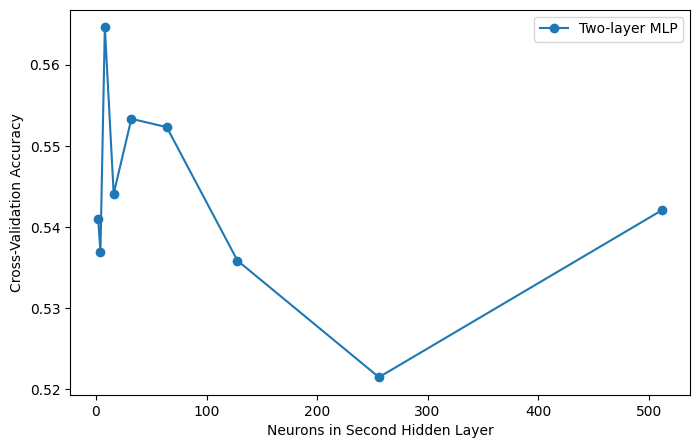

In [135]:
print(f"Single-layer model (neurons={num_neurons}): CV accuracy = {test_acc:.3f}")

a = 0 

for num_layers in second_layer_neurons:
    print(f"Two-layer model ({num_neurons}, {num_layers}): CV accuracy = {cv_mean_2nd[a]:.3f}")
    a += 1

# --- Plotting results ---
plt.figure(figsize=(8, 5))
plt.plot(second_layer_neurons, cv_mean_2nd, marker='o', label='Two-layer MLP')
plt.xlabel('Neurons in Second Hidden Layer')
plt.ylabel('Cross-Validation Accuracy')
plt.legend()
plt.show()

# For same number of neurons (i.e., 128), the cross-validation accuracy increased from 0.447 to 0.536 after addition of a hidden layer with same number of neurons.

# 6. Train and tune a pipelined version of the MLPClassifier model, using scaling or PCA. Report and discuss if and how model performance changes compared to the original.

In [136]:
#A pipelined MLPClassifier using scaling 

print('Reading list of algorithms to train ...')
models = []
models.append(( 'mlp', MLPClassifier(hidden_layer_sizes=(128,128), activation = 'relu',  
                    alpha=0.001,  learning_rate_init=.001 , max_iter=100, 
                    random_state=seed, verbose=1) ))
models.append(( 'scaled_mlp', make_pipeline( MinMaxScaler(), MLPClassifier(hidden_layer_sizes=(128,128), activation = 'relu',  
                    alpha=0.001,  learning_rate_init=.001 , max_iter=100, 
                    random_state=seed, verbose=1)  )  ))
#models.append(( 'scaled_SVM_std', make_pipeline( StandardScaler(), svm.SVC(random_state=seed) )  ))
print('done \n')

Reading list of algorithms to train ...
done 



In [137]:
k4folds = 5
results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
# create the five folds of the TRAINING data
    print("Splitting data into %s folds" % k4folds)    
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)   
# fit the model using four parts at a time and then validate it on the oher part that was set aside; and repeat five times.
    print("Training model and validating it on each fold") 
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_method) 
    results.append(cv_results)
    names.append(name)
# some fancy footwork for printing the results
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring_method, cv_results.mean(), cv_results.std())
    print(msg)
    print('\n')
print('done \n')

 ++ NOW WORKING ON ALGORITHM mlp ++
Splitting data into 5 folds
Training model and validating it on each fold
Iteration 1, loss = 7.49637266
Iteration 2, loss = 2.45693386
Iteration 3, loss = 2.23661772
Iteration 4, loss = 2.19446292
Iteration 5, loss = 1.90162731
Iteration 6, loss = 1.73899395
Iteration 7, loss = 1.59862758
Iteration 8, loss = 1.44822955
Iteration 9, loss = 1.32945126
Iteration 10, loss = 1.24755697
Iteration 11, loss = 1.24503695
Iteration 12, loss = 1.21695555
Iteration 13, loss = 1.19429985
Iteration 14, loss = 1.18654512
Iteration 15, loss = 1.16824678
Iteration 16, loss = 1.15332091
Iteration 17, loss = 1.15215087
Iteration 18, loss = 1.14809146
Iteration 19, loss = 1.14765869
Iteration 20, loss = 1.14282129
Iteration 21, loss = 1.14166499
Iteration 22, loss = 1.14844400
Iteration 23, loss = 1.13302001
Iteration 24, loss = 1.13435912
Iteration 25, loss = 1.11468504
Iteration 26, loss = 1.12734942
Iteration 27, loss = 1.14005594
Iteration 28, loss = 1.12851300
Ite

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 1.14899994
Iteration 11, loss = 1.13960389
Iteration 12, loss = 1.12838055
Iteration 13, loss = 1.11815089
Iteration 14, loss = 1.10782336
Iteration 15, loss = 1.09954903
Iteration 16, loss = 1.09132053
Iteration 17, loss = 1.08577341
Iteration 18, loss = 1.07682437
Iteration 19, loss = 1.07194256
Iteration 20, loss = 1.06645431
Iteration 21, loss = 1.06080534
Iteration 22, loss = 1.05671608
Iteration 23, loss = 1.05215406
Iteration 24, loss = 1.04974032
Iteration 25, loss = 1.04511273
Iteration 26, loss = 1.04110561
Iteration 27, loss = 1.03767524
Iteration 28, loss = 1.03327628
Iteration 29, loss = 1.03199396
Iteration 30, loss = 1.02767217
Iteration 31, loss = 1.02528700
Iteration 32, loss = 1.02129780
Iteration 33, loss = 1.02051615
Iteration 34, loss = 1.01838126
Iteration 35, loss = 1.01422461
Iteration 36, loss = 1.01241012
Iteration 37, loss = 1.00911473
Iteration 38, loss = 1.00751782
Iteration 39, loss = 1.00642827
Iteration 40, loss = 1.00307288
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 77, loss = 0.93799118
Iteration 78, loss = 0.93879428
Iteration 79, loss = 0.93519132
Iteration 80, loss = 0.93397127
Iteration 81, loss = 0.93145178
Iteration 82, loss = 0.93089312
Iteration 83, loss = 0.93028909
Iteration 84, loss = 0.92923132
Iteration 85, loss = 0.92998909
Iteration 86, loss = 0.92644946
Iteration 87, loss = 0.92621271
Iteration 88, loss = 0.92614931
Iteration 89, loss = 0.92347603
Iteration 90, loss = 0.92292522
Iteration 91, loss = 0.92342401
Iteration 92, loss = 0.92268363
Iteration 93, loss = 0.91989289
Iteration 94, loss = 0.91812963
Iteration 95, loss = 0.91768391
Iteration 96, loss = 0.91559602
Iteration 97, loss = 0.91524817
Iteration 98, loss = 0.91443090
Iteration 99, loss = 0.91439488
Iteration 100, loss = 0.91234293
Iteration 1, loss = 1.61701239
Iteration 2, loss = 1.47786030
Iteration 3, loss = 1.37619022
Iteration 4, loss = 1.29890763
Iteration 5, loss = 1.24384699
Iteration 6, loss = 1.20514180
Iteration 7, loss = 1.17881392
Iteration 8, l

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 66, loss = 0.97387107
Iteration 67, loss = 0.97434873
Iteration 68, loss = 0.97225765
Iteration 69, loss = 0.97038405
Iteration 70, loss = 0.96898657
Iteration 71, loss = 0.96766194
Iteration 72, loss = 0.96684526
Iteration 73, loss = 0.96929219
Iteration 74, loss = 0.96278558
Iteration 75, loss = 0.96468075
Iteration 76, loss = 0.96117320
Iteration 77, loss = 0.96181480
Iteration 78, loss = 0.95990594
Iteration 79, loss = 0.95821165
Iteration 80, loss = 0.95739161
Iteration 81, loss = 0.95748705
Iteration 82, loss = 0.95855544
Iteration 83, loss = 0.95348305
Iteration 84, loss = 0.95544378
Iteration 85, loss = 0.95023568
Iteration 86, loss = 0.95463460
Iteration 87, loss = 0.94896996
Iteration 88, loss = 0.95129011
Iteration 89, loss = 0.94804195
Iteration 90, loss = 0.94755278
Iteration 91, loss = 0.94633191
Iteration 92, loss = 0.94326930
Iteration 93, loss = 0.94433780
Iteration 94, loss = 0.94306484
Iteration 95, loss = 0.94187686
Iteration 96, loss = 0.93916974
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 52, loss = 0.99080867
Iteration 53, loss = 0.98772408
Iteration 54, loss = 0.98706310
Iteration 55, loss = 0.98386669
Iteration 56, loss = 0.98371303
Iteration 57, loss = 0.98090929
Iteration 58, loss = 0.98059167
Iteration 59, loss = 0.97856425
Iteration 60, loss = 0.97636880
Iteration 61, loss = 0.97471704
Iteration 62, loss = 0.97419016
Iteration 63, loss = 0.97138777
Iteration 64, loss = 0.97128100
Iteration 65, loss = 0.96971795
Iteration 66, loss = 0.96851029
Iteration 67, loss = 0.96607555
Iteration 68, loss = 0.96641245
Iteration 69, loss = 0.96472355
Iteration 70, loss = 0.96219711
Iteration 71, loss = 0.96479273
Iteration 72, loss = 0.95946921
Iteration 73, loss = 0.96218192
Iteration 74, loss = 0.95877735
Iteration 75, loss = 0.95711893
Iteration 76, loss = 0.95562658
Iteration 77, loss = 0.95456772
Iteration 78, loss = 0.95300696
Iteration 79, loss = 0.95129816
Iteration 80, loss = 0.94994078
Iteration 81, loss = 0.94913594
Iteration 82, loss = 0.95033436
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [139]:
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)    
# some fancy footwork for printing the results
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring_method, cv_results.mean(), cv_results.std())
    print(msg)
    print('\n')
print('done \n')

 ++ NOW WORKING ON ALGORITHM mlp ++
algorithm mlp f1_micro results: mean = 0.554449 (std = 0.017960)


 ++ NOW WORKING ON ALGORITHM scaled_mlp ++
algorithm scaled_mlp f1_micro results: mean = 0.554449 (std = 0.017960)


done 



# For the given data  and used method, scaling did not improve the accuracy

# 7. Train and tune a new classifier model that is not a neural network (you can reuse one from H/W assignment #2 if you want).


In [140]:
#adding non-neural network classifiers from previous homework
models.append(( 'raw_SVM', svm.SVC(random_state=seed) ))
models.append(( 'scaled_SVM', make_pipeline( MinMaxScaler(), svm.SVC(random_state=seed) )  ))
models.append(( 'scaled_SVM_std', make_pipeline( StandardScaler(), svm.SVC(random_state=seed) )  ))
print('done \n')

k4folds = 5
results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
# create the five folds of the TRAINING data
    print("Splitting data into %s folds" % k4folds)    
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)   
# fit the model using four parts at a time and then validate it on the oher part that was set aside; and repeat five times.
    print("Training model and validating it on each fold") 
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_method) 
    results.append(cv_results)
    names.append(name)
    print('\n')
print('done \n')


done 

 ++ NOW WORKING ON ALGORITHM mlp ++
Splitting data into 5 folds
Training model and validating it on each fold
Iteration 1, loss = 7.49637266
Iteration 2, loss = 2.45693386
Iteration 3, loss = 2.23661772
Iteration 4, loss = 2.19446292
Iteration 5, loss = 1.90162731
Iteration 6, loss = 1.73899395
Iteration 7, loss = 1.59862758
Iteration 8, loss = 1.44822955
Iteration 9, loss = 1.32945126
Iteration 10, loss = 1.24755697
Iteration 11, loss = 1.24503695
Iteration 12, loss = 1.21695555
Iteration 13, loss = 1.19429985
Iteration 14, loss = 1.18654512
Iteration 15, loss = 1.16824678
Iteration 16, loss = 1.15332091
Iteration 17, loss = 1.15215087
Iteration 18, loss = 1.14809146
Iteration 19, loss = 1.14765869
Iteration 20, loss = 1.14282129
Iteration 21, loss = 1.14166499
Iteration 22, loss = 1.14844400
Iteration 23, loss = 1.13302001
Iteration 24, loss = 1.13435912
Iteration 25, loss = 1.11468504
Iteration 26, loss = 1.12734942
Iteration 27, loss = 1.14005594
Iteration 28, loss = 1.12851

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 1.19190731
Iteration 8, loss = 1.17374913
Iteration 9, loss = 1.16018653
Iteration 10, loss = 1.14899994
Iteration 11, loss = 1.13960389
Iteration 12, loss = 1.12838055
Iteration 13, loss = 1.11815089
Iteration 14, loss = 1.10782336
Iteration 15, loss = 1.09954903
Iteration 16, loss = 1.09132053
Iteration 17, loss = 1.08577341
Iteration 18, loss = 1.07682437
Iteration 19, loss = 1.07194256
Iteration 20, loss = 1.06645431
Iteration 21, loss = 1.06080534
Iteration 22, loss = 1.05671608
Iteration 23, loss = 1.05215406
Iteration 24, loss = 1.04974032
Iteration 25, loss = 1.04511273
Iteration 26, loss = 1.04110561
Iteration 27, loss = 1.03767524
Iteration 28, loss = 1.03327628
Iteration 29, loss = 1.03199396
Iteration 30, loss = 1.02767217
Iteration 31, loss = 1.02528700
Iteration 32, loss = 1.02129780
Iteration 33, loss = 1.02051615
Iteration 34, loss = 1.01838126
Iteration 35, loss = 1.01422461
Iteration 36, loss = 1.01241012
Iteration 37, loss = 1.00911473
Iteration 3

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 1.24580205
Iteration 6, loss = 1.20818776
Iteration 7, loss = 1.18241126
Iteration 8, loss = 1.16269751
Iteration 9, loss = 1.14876108
Iteration 10, loss = 1.13907631
Iteration 11, loss = 1.12769497
Iteration 12, loss = 1.11575120
Iteration 13, loss = 1.10636894
Iteration 14, loss = 1.09788658
Iteration 15, loss = 1.08895229
Iteration 16, loss = 1.08031494
Iteration 17, loss = 1.07455555
Iteration 18, loss = 1.06769804
Iteration 19, loss = 1.06219473
Iteration 20, loss = 1.05737331
Iteration 21, loss = 1.05225470
Iteration 22, loss = 1.04784518
Iteration 23, loss = 1.04665133
Iteration 24, loss = 1.04013749
Iteration 25, loss = 1.03756511
Iteration 26, loss = 1.03327673
Iteration 27, loss = 1.03109535
Iteration 28, loss = 1.02690895
Iteration 29, loss = 1.02549040
Iteration 30, loss = 1.02139735
Iteration 31, loss = 1.02197244
Iteration 32, loss = 1.01992034
Iteration 33, loss = 1.01750520
Iteration 34, loss = 1.01360203
Iteration 35, loss = 1.01144943
Iteration 36,

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 82, loss = 0.95855544
Iteration 83, loss = 0.95348305
Iteration 84, loss = 0.95544378
Iteration 85, loss = 0.95023568
Iteration 86, loss = 0.95463460
Iteration 87, loss = 0.94896996
Iteration 88, loss = 0.95129011
Iteration 89, loss = 0.94804195
Iteration 90, loss = 0.94755278
Iteration 91, loss = 0.94633191
Iteration 92, loss = 0.94326930
Iteration 93, loss = 0.94433780
Iteration 94, loss = 0.94306484
Iteration 95, loss = 0.94187686
Iteration 96, loss = 0.93916974
Iteration 97, loss = 0.93882806
Iteration 98, loss = 0.93821835
Iteration 99, loss = 0.93633914
Iteration 100, loss = 0.93551852
Iteration 1, loss = 1.61144574
Iteration 2, loss = 1.48014831
Iteration 3, loss = 1.38520477
Iteration 4, loss = 1.31366331
Iteration 5, loss = 1.26038195
Iteration 6, loss = 1.22270586
Iteration 7, loss = 1.19321669
Iteration 8, loss = 1.17487766
Iteration 9, loss = 1.16280286
Iteration 10, loss = 1.15274585
Iteration 11, loss = 1.14337496
Iteration 12, loss = 1.13335202
Iteration 13, lo

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 61, loss = 0.97471704
Iteration 62, loss = 0.97419016
Iteration 63, loss = 0.97138777
Iteration 64, loss = 0.97128100
Iteration 65, loss = 0.96971795
Iteration 66, loss = 0.96851029
Iteration 67, loss = 0.96607555
Iteration 68, loss = 0.96641245
Iteration 69, loss = 0.96472355
Iteration 70, loss = 0.96219711
Iteration 71, loss = 0.96479273
Iteration 72, loss = 0.95946921
Iteration 73, loss = 0.96218192
Iteration 74, loss = 0.95877735
Iteration 75, loss = 0.95711893
Iteration 76, loss = 0.95562658
Iteration 77, loss = 0.95456772
Iteration 78, loss = 0.95300696
Iteration 79, loss = 0.95129816
Iteration 80, loss = 0.94994078
Iteration 81, loss = 0.94913594
Iteration 82, loss = 0.95033436
Iteration 83, loss = 0.94750586
Iteration 84, loss = 0.94529970
Iteration 85, loss = 0.94395093
Iteration 86, loss = 0.94399284
Iteration 87, loss = 0.94212804
Iteration 88, loss = 0.94089806
Iteration 89, loss = 0.93947847
Iteration 90, loss = 0.94039621
Iteration 91, loss = 0.94119262
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(




 ++ NOW WORKING ON ALGORITHM scaled_SVM ++
Splitting data into 5 folds
Training model and validating it on each fold


 ++ NOW WORKING ON ALGORITHM scaled_SVM_std ++
Splitting data into 5 folds
Training model and validating it on each fold


done 



In [159]:
a = 0
print(results)
for name, model in models:   # Select each model in turn
    print(" ---- ALGORITHM: %s ----" % name)    
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring_method, cv_results.mean(), cv_results.std())
    a += 1
    print(msg)
    print('\n')
print('done \n')

[array([0.48717949, 0.51794872, 0.48205128, 0.47692308, 0.48453608]), array([0.54358974, 0.54358974, 0.53846154, 0.55897436, 0.58762887]), array([0.48205128, 0.41538462, 0.49230769, 0.48717949, 0.48453608]), array([0.55384615, 0.52307692, 0.54358974, 0.54871795, 0.54639175]), array([0.55384615, 0.54871795, 0.56410256, 0.57435897, 0.54639175])]
 ---- ALGORITHM: mlp ----
algorithm mlp f1_micro results: mean = 0.559122 (std = 0.019921)


 ---- ALGORITHM: scaled_mlp ----
algorithm scaled_mlp f1_micro results: mean = 0.559122 (std = 0.019921)


 ---- ALGORITHM: raw_SVM ----
algorithm raw_SVM f1_micro results: mean = 0.559122 (std = 0.019921)


 ---- ALGORITHM: scaled_SVM ----
algorithm scaled_SVM f1_micro results: mean = 0.559122 (std = 0.019921)


 ---- ALGORITHM: scaled_SVM_std ----
algorithm scaled_SVM_std f1_micro results: mean = 0.559122 (std = 0.019921)


done 



# 8. Test this new model’s performance on the summative test set and compare to the best MLPClassifier. Report and discuss your results

In [144]:
k4folds = 5
final_results = []
names = []

for name, model in models:   # Select each model in turn
    #print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_test, y_test, scoring=scoring_method) 
    final_results.append(cv_results)
    names.append(name)
    print('\n')
print('done \n')

Iteration 1, loss = 3.88056398
Iteration 2, loss = 1.72539666
Iteration 3, loss = 1.33297863
Iteration 4, loss = 1.24983255
Iteration 5, loss = 1.23448205
Iteration 6, loss = 1.22568178
Iteration 7, loss = 1.21670675
Iteration 8, loss = 1.19599367
Iteration 9, loss = 1.20748454
Iteration 10, loss = 1.20846033
Iteration 11, loss = 1.20154790
Iteration 12, loss = 1.19597495
Iteration 13, loss = 1.18113882
Iteration 14, loss = 1.19383099
Iteration 15, loss = 1.16621283
Iteration 16, loss = 1.18091341
Iteration 17, loss = 1.20023963
Iteration 18, loss = 1.19225937
Iteration 19, loss = 1.16913873
Iteration 20, loss = 1.18554481
Iteration 21, loss = 1.22027805
Iteration 22, loss = 1.16835136
Iteration 23, loss = 1.14982606
Iteration 24, loss = 1.16404695
Iteration 25, loss = 1.20016463
Iteration 26, loss = 1.17241732
Iteration 27, loss = 1.15121819
Iteration 28, loss = 1.16669467
Iteration 29, loss = 1.16530123
Iteration 30, loss = 1.16649919
Iteration 31, loss = 1.15717559
Iteration 32, los

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 1.09763903
Iteration 13, loss = 1.08758158
Iteration 14, loss = 1.08269713
Iteration 15, loss = 1.07784371
Iteration 16, loss = 1.07481740
Iteration 17, loss = 1.07243903
Iteration 18, loss = 1.07064386
Iteration 19, loss = 1.06619363
Iteration 20, loss = 1.05987516
Iteration 21, loss = 1.05886882
Iteration 22, loss = 1.05599347
Iteration 23, loss = 1.05864418
Iteration 24, loss = 1.05268381
Iteration 25, loss = 1.05174600
Iteration 26, loss = 1.05053276
Iteration 27, loss = 1.04704122
Iteration 28, loss = 1.04818675
Iteration 29, loss = 1.04602836
Iteration 30, loss = 1.04353172
Iteration 31, loss = 1.04255951
Iteration 32, loss = 1.04018003
Iteration 33, loss = 1.03905451
Iteration 34, loss = 1.03923081
Iteration 35, loss = 1.03531748
Iteration 36, loss = 1.03522898
Iteration 37, loss = 1.03717799
Iteration 38, loss = 1.03400819
Iteration 39, loss = 1.03165351
Iteration 40, loss = 1.02943216
Iteration 41, loss = 1.03022974
Iteration 42, loss = 1.03019033
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 1.04982771
Iteration 20, loss = 1.04598015
Iteration 21, loss = 1.04114336
Iteration 22, loss = 1.04322705
Iteration 23, loss = 1.03990531
Iteration 24, loss = 1.03651942
Iteration 25, loss = 1.03439118
Iteration 26, loss = 1.03304933
Iteration 27, loss = 1.03158572
Iteration 28, loss = 1.03100674
Iteration 29, loss = 1.03016363
Iteration 30, loss = 1.03037425
Iteration 31, loss = 1.02403849
Iteration 32, loss = 1.02476171
Iteration 33, loss = 1.02420290
Iteration 34, loss = 1.02122401
Iteration 35, loss = 1.01978432
Iteration 36, loss = 1.01946350
Iteration 37, loss = 1.01823498
Iteration 38, loss = 1.01647574
Iteration 39, loss = 1.01719654
Iteration 40, loss = 1.01395807
Iteration 41, loss = 1.01999749
Iteration 42, loss = 1.01228367
Iteration 43, loss = 1.01257330
Iteration 44, loss = 1.00920247
Iteration 45, loss = 1.00976877
Iteration 46, loss = 1.00753491
Iteration 47, loss = 1.00581849
Iteration 48, loss = 1.00523170
Iteration 49, loss = 1.00371407
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.45938765
Iteration 2, loss = 1.26214550
Iteration 3, loss = 1.21272090
Iteration 4, loss = 1.17740466
Iteration 5, loss = 1.15011427
Iteration 6, loss = 1.13398901
Iteration 7, loss = 1.12093675
Iteration 8, loss = 1.10635116
Iteration 9, loss = 1.09767872
Iteration 10, loss = 1.08843243
Iteration 11, loss = 1.08181269
Iteration 12, loss = 1.07862770
Iteration 13, loss = 1.06891594
Iteration 14, loss = 1.06703049
Iteration 15, loss = 1.06324012
Iteration 16, loss = 1.05793116
Iteration 17, loss = 1.05462861
Iteration 18, loss = 1.05207880
Iteration 19, loss = 1.05327465
Iteration 20, loss = 1.04863943
Iteration 21, loss = 1.04508725
Iteration 22, loss = 1.04523565
Iteration 23, loss = 1.04039265
Iteration 24, loss = 1.03872811
Iteration 25, loss = 1.03655510
Iteration 26, loss = 1.03518650
Iteration 27, loss = 1.03205054
Iteration 28, loss = 1.03190877
Iteration 29, loss = 1.03054222
Iteration 30, loss = 1.03066488
Iteration 31, loss = 1.02792666
Iteration 32, los

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 1.07461338
Iteration 17, loss = 1.06926947
Iteration 18, loss = 1.06506730
Iteration 19, loss = 1.06584761
Iteration 20, loss = 1.06261279
Iteration 21, loss = 1.05927926
Iteration 22, loss = 1.05671277
Iteration 23, loss = 1.05478382
Iteration 24, loss = 1.05417810
Iteration 25, loss = 1.05227829
Iteration 26, loss = 1.05346341
Iteration 27, loss = 1.05342228
Iteration 28, loss = 1.04717705
Iteration 29, loss = 1.04827009
Iteration 30, loss = 1.04217399
Iteration 31, loss = 1.04353384
Iteration 32, loss = 1.04627007
Iteration 33, loss = 1.04399974
Iteration 34, loss = 1.03854438
Iteration 35, loss = 1.03774134
Iteration 36, loss = 1.03994971
Iteration 37, loss = 1.04608634
Iteration 38, loss = 1.03669977
Iteration 39, loss = 1.03383220
Iteration 40, loss = 1.03370303
Iteration 41, loss = 1.02834822
Iteration 42, loss = 1.03243256
Iteration 43, loss = 1.02799565
Iteration 44, loss = 1.02555962
Iteration 45, loss = 1.02547931
Iteration 46, loss = 1.02306703
Iteratio

/Users/mbhendal/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(








done 



In [160]:
for name, model in models:   # Select each model in turn
    print(" ---- ALGORITHM: %s ----" % name)    
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring_method, cv_results.mean(), cv_results.std())
    print(msg)
    print('\n')
print('done \n')

 ---- ALGORITHM: mlp ----
algorithm mlp f1_micro results: mean = 0.559122 (std = 0.019921)


 ---- ALGORITHM: scaled_mlp ----
algorithm scaled_mlp f1_micro results: mean = 0.559122 (std = 0.019921)


 ---- ALGORITHM: raw_SVM ----
algorithm raw_SVM f1_micro results: mean = 0.559122 (std = 0.019921)


 ---- ALGORITHM: scaled_SVM ----
algorithm scaled_SVM f1_micro results: mean = 0.559122 (std = 0.019921)


 ---- ALGORITHM: scaled_SVM_std ----
algorithm scaled_SVM_std f1_micro results: mean = 0.559122 (std = 0.019921)


done 

